In [1]:
# phase-1: Foundation & Market Analysis

In [2]:
# 1. Load and explore the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load dataset from Evoastra portal
df = pd.read_csv(r"telecom_market_data_80percent.csv")
# Initial data exploration
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")
print(f"Missing values:\n{df.isnull().sum()}")
# Basic statistics
print(f"Date range: {df['year'].min()} - {df['year'].max()}")
print(f"Unique operators: {df['service_provider'].nunique()}")
print(f"Unique circles: {df['circle'].nunique()}")
print(f"Subscriber range: {df['value'].min():,} to {df['value'].max():,}")

Dataset shape: (56582, 8)
Columns: ['year', 'month', 'circle', 'type_of_connection', 'service_provider', 'value', 'unit', 'notes']
Data types:
year                   int64
month                 object
circle                object
type_of_connection    object
service_provider      object
value                  int64
unit                  object
notes                 object
dtype: object
Missing values:
year                      0
month                     0
circle                    0
type_of_connection        0
service_provider          0
value                     0
unit                      0
notes                 56071
dtype: int64
Date range: 2009 - 2025
Unique operators: 41
Unique circles: 37
Subscriber range: 0 to 402,668,297


In [3]:
df.dtypes

year                   int64
month                 object
circle                object
type_of_connection    object
service_provider      object
value                  int64
unit                  object
notes                 object
dtype: object

In [4]:
df.head()

,year,month,circle,type_of_connection,service_provider,value,unit,notes
0,2018,March,Assam,wireless,BSNL,1964401,value in absolute number,NaN
1,2018,March,Bihar,wireless,BSNL,4430024,value in absolute number,NaN
2,2018,March,Delhi,wireless,BSNL,0,value in absolute number,NaN
3,2018,March,Gujarat,wireless,BSNL,5810246,value in absolute number,NaN
4,2018,March,Haryana,wireless,BSNL,4476401,value in absolute number,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56582 entries, 0 to 56581
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                56582 non-null  int64 
 1   month               56582 non-null  object
 2   circle              56582 non-null  object
 3   type_of_connection  56582 non-null  object
 4   service_provider    56582 non-null  object
 5   value               56582 non-null  int64 
 6   unit                56582 non-null  object
 7   notes               511 non-null    object
dtypes: int64(2), object(6)
memory usage: 3.5+ MB


In [6]:
df.describe(include='all')

,year,month,circle,type_of_connection,service_provider,value,unit,notes
count,56582.000000,56582,56582,56582,56582,5.658200e+04,56582,511
unique,NaN,12,37,2,41,NaN,1,69
top,NaN,January,All India,wireless,BSNL,NaN,value in absolute number,"service_provide: M/s Etisalat, S Tel and Loop ..."
freq,NaN,5173,2891,33319,6694,NaN,56582,69
mean,2014.745078,NaN,NaN,NaN,NaN,3.618782e+06,NaN,NaN
std,4.343761,NaN,NaN,NaN,NaN,1.582850e+07,NaN,NaN
min,2009.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
50%,2014.000000,NaN,NaN,NaN,NaN,9.186350e+04,NaN,NaN
75%,2017.000000,NaN,NaN,NaN,NaN,2.473480e+06,NaN,NaN


In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

In [8]:
numeric_cols

Index(['year', 'value'], dtype='object')

In [9]:
# 1. Comprehensive data quality assessment
def assess_data_quality(df):
    quality_report = {
    'total_records': len(df),
    'missing_values': df.isnull().sum().to_dict(),
    'duplicate_records': df.duplicated().sum(),
    'unique_values': {col: df[col].nunique() for col in df.columns}
    }
    # Check for obvious outliers
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
        quality_report[f'{col}_outliers'] = len(outliers)
    return quality_report
quality_report = assess_data_quality(df)
print("Data Quality Report:", quality_report)


Data Quality Report: {'total_records': 56582, 'missing_values': {'year': 0, 'month': 0, 'circle': 0, 'type_of_connection': 0, 'service_provider': 0, 'value': 0, 'unit': 0, 'notes': 56071}, 'duplicate_records': 0, 'unique_values': {'year': 17, 'month': 12, 'circle': 37, 'type_of_connection': 2, 'service_provider': 41, 'value': 34682, 'unit': 1, 'notes': 69}, 'year_outliers': 0, 'value_outliers': 6907}


In [10]:
print("Data Quality Report:",end="")
for i in quality_report.items():
    print(i)

Data Quality Report:('total_records', 56582)
('missing_values', {'year': 0, 'month': 0, 'circle': 0, 'type_of_connection': 0, 'service_provider': 0, 'value': 0, 'unit': 0, 'notes': 56071})
('duplicate_records', 0)
('unique_values', {'year': 17, 'month': 12, 'circle': 37, 'type_of_connection': 2, 'service_provider': 41, 'value': 34682, 'unit': 1, 'notes': 69})
('year_outliers', 0)
('value_outliers', 6907)


In [11]:
def clean_telecom_data(df):
    """
    Cleans and standardizes the telecom market data DataFrame.
    Fixes the ValueError by correctly parsing month names.
    """
    df_clean = df.copy()
    
    # 1. Handle missing values
    # NOTE: 'ffill' (forward fill) works best if data is sorted by time.
    df_clean['value'] = df_clean['value'].fillna(method='ffill')
    
    # 2. Standardize data types and text fields
    df_clean['service_provider'] = df_clean['service_provider'].str.upper().str.strip()
    df_clean['circle'] = df_clean['circle'].str.title().str.strip()
    df_clean['type_of_connection'] = df_clean['type_of_connection'].str.lower().str.strip()
    
    # Ensure year and value are numeric
    df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
    df_clean['value'] = pd.to_numeric(df_clean['value'], errors='coerce')
    
    # 3. FIX: Create date column using explicit format
    # '%Y-%B-%d' tells pandas to look for a 4-digit year, a full month name (like April), and a day.
    df_clean['date'] = pd.to_datetime(
        df_clean['year'].astype(str) + '-' + df_clean['month'].astype(str) + '-01',
        format='%Y-%B-%d',
        errors='coerce' # Converts any unparseable dates to NaT (Not a Time)
    )
    
    # 4. Remove obvious errors and incomplete data
    
    # Remove rows where value is not positive (using fillna(0) to safely handle NaN values created by 'coerce')
    df_clean = df_clean[df_clean['value'].fillna(0) > 0] 
    
    # Remove rows where the date could not be created (NaT)
    df_clean = df_clean.dropna(subset=['date'])
    
    return df_clean

# Example usage (assuming 'df' is your original loaded DataFrame):
df_clean = clean_telecom_data(df)
print(f"Cleaned dataset shape: {df_clean.shape}")

Cleaned dataset shape: (38158, 9)


C:\Users\MyPC\AppData\Local\Temp\ipykernel_1196\595315910.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean['value'] = df_clean['value'].fillna(method='ffill')


In [12]:
# 1. Market share and competitive analysis
def analyze_market_structure(df):
    """
    Calculates key competition metrics: total subscribers, market share, 
    number of competitors, and the HHI.
    Fixes the incomplete transform calls from the original snippet.
    """
    # 1. Calculate total market subscribers per circle/date group
    # FIX: 'su' completed to 'sum'
    df['total_circle_subscribers'] = df.groupby(['circle', 'date'])['value'].transform('sum')
    
    # 2. Calculate market share for each service provider
    df['market_share'] = df['value'] / df['total_circle_subscribers']
    
    # 3. Competitive intensity analysis: Calculate number of competitors
    # FIX: Incomplete transform call completed with 'nunique'
    df['num_competitors'] = df.groupby(['circle', 'date'])['service_provider'].transform('nunique')
    
    # 4. HHI (Herfindahl-Hirschman Index) calculation
    def calculate_hhi(group):
        market_shares = group['market_share']
        # HHI is the sum of the squares of the market shares (Result is between 0 and 1)
        return (market_shares ** 2).sum()
        
    hhi_by_circle = df.groupby(['circle', 'date']).apply(calculate_hhi)
    
    return df, hhi_by_circle
df_market, hhi_data = analyze_market_structure(df_clean)
print("Market structure analysis completed")

Market structure analysis completed


C:\Users\MyPC\AppData\Local\Temp\ipykernel_1196\176024607.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hhi_by_circle = df.groupby(['circle', 'date']).apply(calculate_hhi)


In [13]:
df_market

,year,month,circle,type_of_connection,service_provider,value,unit,notes,date,total_circle_subscribers,market_share,num_competitors
0,2018,March,Assam,wireless,BSNL,1964401,value in absolute number,NaN,2018-03-01,5629848,0.348926,3
1,2018,March,Bihar,wireless,BSNL,4430024,value in absolute number,NaN,2018-03-01,24144673,0.183478,6
3,2018,March,Gujarat,wireless,BSNL,5810246,value in absolute number,NaN,2018-03-01,26538745,0.218934,7
4,2018,March,Haryana,wireless,BSNL,4476401,value in absolute number,NaN,2018-03-01,9550194,0.468724,6
5,2018,March,Himachal Pradesh,wireless,BSNL,2571438,value in absolute number,NaN,2018-03-01,4659487,0.551871,5
...,...,...,...,...,...,...,...,...,...,...,...,...
51385,2013,April,All India,wireline,MTNL,3551484,value in absolute number,NaN,2013-04-01,890739173,0.003987,13
51386,2013,April,Andhra Pradesh,wireline,BHARTI AIRTEL,125920,value in absolute number,NaN,2013-04-01,66594826,0.001891,8
51387,2013,April,Delhi,wireline,BHARTI AIRTEL,1084426,value in absolute number,NaN,2013-04-01,42924789,0.025263,8
51388,2013,April,Gujarat,wireline,BHARTI AIRTEL,55506,value in absolute number,NaN,2013-04-01,53249328,0.001042,10


In [14]:
hhi_data

circle       date      
All India    2009-01-01    0.161348
             2009-02-01    0.161533
             2009-03-01    0.160806
             2009-04-01    0.160839
             2009-05-01    0.160873
                             ...   
West Bengal  2024-12-01    0.467271
             2025-01-01    0.395246
             2025-02-01    0.392114
             2025-03-01    0.392490
             2025-04-01    0.462844
Length: 4420, dtype: float64

In [15]:
def analyze_temporal_patterns(df):
    """
    Calculates month-over-month changes, seasonal features, and rolling averages
    by service provider and circle.
    """
    df_sorted = df.sort_values(['service_provider', 'circle', 'date']).copy()
    
    # 1. Calculate month-over-month changes
    # FIX: Added 'value'].diff()
    df_sorted['subscriber_change'] = df_sorted.groupby(['service_provider', 'circle'])['value'].diff()
    
    # 2. Identify seasonal patterns
    df_sorted['month_num'] = df_sorted['date'].dt.month
    df_sorted['quarter'] = df_sorted['date'].dt.quarter
    
    # 3. Calculate rolling averages
    for window in [3, 6, 12]:
        # FIX: Added 'value' and the correct rolling method using transform
        df_sorted[f'subscribers_ma_{window}'] = df_sorted.groupby(['service_provider', 'circle'])['value'].transform(
            # rolling().mean() calculates the moving average within the current group
            lambda x: x.rolling(window=window, min_periods=1).mean()
        )
        
    return df_sorted

# Assuming df_market is your cleaned and prepared DataFrame
df_temporal = analyze_temporal_patterns(df_market)
print("Temporal pattern analysis completed")
df_temporal

Temporal pattern analysis completed


,year,month,circle,type_of_connection,service_provider,value,unit,notes,date,total_circle_subscribers,market_share,num_competitors,subscriber_change,month_num,quarter,subscribers_ma_3,subscribers_ma_6,subscribers_ma_12
33260,2009,January,All India,wireless,AIRCEL,16761397,value in absolute number,NaN,2009-01-01,362294842,0.046265,12,NaN,1,1,1.676140e+07,1.676140e+07,1.676140e+07
32912,2009,February,All India,wireless,AIRCEL,17099390,value in absolute number,NaN,2009-02-01,375742592,0.045508,12,337993.0,2,1,1.693039e+07,1.693039e+07,1.693039e+07
32564,2009,March,All India,wireless,AIRCEL,18478325,value in absolute number,NaN,2009-03-01,391760569,0.047167,12,1378935.0,3,1,1.744637e+07,1.744637e+07,1.744637e+07
32216,2009,April,All India,wireless,AIRCEL,19585299,value in absolute number,NaN,2009-04-01,403663316,0.048519,12,1106974.0,4,2,1.838767e+07,1.798110e+07,1.798110e+07
31868,2009,May,All India,wireless,AIRCEL,20685711,value in absolute number,NaN,2009-05-01,415246442,0.049816,12,1100412.0,5,2,1.958311e+07,1.852202e+07,1.852202e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,2024,December,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,NaN,2024-12-01,694491,0.000216,6,0.0,12,4,1.500000e+02,1.500000e+02,1.500000e+02
34168,2025,January,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,NaN,2025-01-01,542915,0.000276,6,0.0,1,1,1.500000e+02,1.500000e+02,1.500000e+02
33938,2025,February,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,NaN,2025-02-01,568795,0.000264,6,0.0,2,1,1.500000e+02,1.500000e+02,1.500000e+02
33708,2025,March,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,NaN,2025-03-01,578019,0.000260,6,0.0,3,1,1.500000e+02,1.500000e+02,1.500000e+02


In [16]:
# phase-2: Feature Engineering & Target Definition

In [17]:
def create_churn_targets(df):
    df_churn = df.copy()
    
    # CRITICAL FIX: Calculate the percentage change first
    # 1. Get the value from the previous month
    df_churn['previous_value'] = df_churn.groupby(['service_provider', 'circle'])['value'].shift(1)
    
    # 2. Calculate the month-over-month percentage change (Subscriber Change / Previous Value)
    df_churn['subscriber_percent_change'] = df_churn['subscriber_change'] / df_churn['previous_value']

    # Primary churn definition: >15% month-over-month decline
    df_churn['churn_binary'] = (df_churn['subscriber_percent_change'] < -0.15).astype(int)

    # Severity-based churn categories
    def categorize_churn_severity(change):
        if pd.isna(change):
            return 'None' # Handle NaNs which occur in the first month
        if change < -0.30:
            return 'High'
        elif change < -0.15:
            return 'Medium'
        elif change < -0.05:
            return 'Low'
        else:
            return 'None'
            
    df_churn['churn_severity'] = df_churn['subscriber_percent_change'].apply(categorize_churn_severity)

    # Sustained churn: decline for 2+ consecutive months
    # FIX: Corrected the broken logic chain for rolling application
    df_churn['declining_trend'] = (
        df_churn.groupby(['service_provider', 'circle'])['subscriber_change']
        .rolling(window=2)
        .apply(lambda x: (x < 0).all(), raw=False)
        .reset_index(level=[0, 1], drop=True) 
        .fillna(0)
        .astype(int)
    )
    
    # Clean up and return
    df_churn.drop(columns=['previous_value'], inplace=True)
    
    return df_churn
df_with_targets = create_churn_targets(df_temporal)
print(f"Churn distribution:\n{df_with_targets['churn_severity'].value_counts()}")

Churn distribution:
churn_severity
None      32983
High       3934
Low        1011
Medium      230
Name: count, dtype: int64


In [18]:
def validate_churn_patterns(df):
    """
    Validates churn definitions against business logic by analyzing churn rates 
    across operator categories and circles.
    """
    # Analyze churn by operator category
    major_operators = ['JIO', 'AIRTEL', 'VI', 'BSNL']
    
    # Create the operator category column
    df['operator_category'] = df['service_provider'].apply(
        # Check if the service provider name contains any of the major operator names
        lambda x: 'Major' if any(op in x.upper() for op in major_operators) else 'Regional'
    )
    
    # Churn analysis by operator category
    churn_by_category = df.groupby('operator_category')['churn_binary'].mean()
    print(f"Churn rates by operator category:\n{churn_by_category}")
    
    # Geographic churn analysis
    churn_by_circle = df.groupby('circle')['churn_binary'].mean().sort_values(ascending=False)
    print(f"Top 10 circles by churn rate:\n{churn_by_circle.head(10)}")
    
    return df

df_validated = validate_churn_patterns(df_with_targets)

Churn rates by operator category:
operator_category
Major       0.152039
Regional    0.080467
Name: churn_binary, dtype: float64
Top 10 circles by churn rate:
circle
Rajasthan               0.144558
Punjab                  0.135602
Madhya Pradesh          0.126643
All India               0.122716
Haryana                 0.121530
Uttar Pradesh (East)    0.120392
Uttar Pradesh (West)    0.119486
Assam                   0.119481
Delhi                   0.118890
Andhra Pradesh          0.118336
Name: churn_binary, dtype: float64


In [19]:
def calculate_trend(series):
    """
    Calculates the slope (trend coefficient) of subscriber 'value' 
    over a rolling window using linear regression (polyfit).
    """
    # 1. Identify non-NaN values
    valid_indices = series.notna()
    
    # 2. Require at least 3 non-NaN points to fit a line
    if valid_indices.sum() < 3:
        return np.nan
    
    # 3. Prepare x (time index) and y (subscriber values)
    # x is the index within the window (0, 1, 2, ...)
    x = np.arange(len(series))[valid_indices]
    y = series[valid_indices].values
    
    # 4. Calculate the slope (trend coefficient)
    # np.polyfit(x, y, 1)[0] returns the slope (m) for the linear fit y = mx + c
    return np.polyfit(x, y, 1)[0]


def create_temporal_features(df):
    df_features = df.copy()
    
    # Ensure data is sorted for all temporal operations
    df_features.sort_values(['service_provider', 'circle', 'date'], inplace=True)
    
    # 1. Lag features (Subscribers from previous months)
    for lag in [1, 3, 6, 12]:
        # FIX: Added .shift(lag)
        df_features[f'subscribers_lag_{lag}'] = df_features.groupby(['service_provider', 'circle'])['value'].shift(lag)
        
    # 2. Growth rates (Percentage change)
    # FIX: Added .pct_change()
    df_features['mom_growth'] = df_features.groupby(['service_provider', 'circle'])['value'].pct_change(periods=1)
    df_features['yoy_growth'] = df_features.groupby(['service_provider', 'circle'])['value'].pct_change(periods=12)
    
    # 3. Volatility measures (Standard Deviation of MoM change)
    for window in [3, 6, 12]:
        # FIX: Completed the groupby and transform with rolling().std()
        df_features[f'growth_volatility_{window}'] = df_features.groupby(['service_provider', 'circle'])['subscriber_percent_change'].transform(
            lambda x: x.rolling(window=window, min_periods=3).std()
        )
        
    # 4. Trend coefficients (12-month trend)
    # FIX: Completed the groupby and rolling.apply()
    df_features['trend_12m'] = df_features.groupby(['service_provider', 'circle'])['value'].rolling(window=12, min_periods=3).apply(
        calculate_trend, raw=False
    ).reset_index(level=[0, 1], drop=True)

    return df_features

df_temporal_features = create_temporal_features(df_validated)
print(f"Temporal features created. New shape: {df_temporal_features.shape}")

Temporal features created. New shape: (38158, 33)


In [20]:
def create_advanced_features(df):
    df_advanced = df.copy()
    
    # Ensure dataframe is sorted for correct temporal calculations
    df_advanced.sort_values(['service_provider', 'circle', 'date'], inplace=True)
    
    # First derivative (momentum)
    # FIX: Uses .pct_change(periods=1). Note: This is equivalent to mom_growth.
    # We assign it to 'growth_momentum' for clarity in this function.
    df_advanced['growth_momentum'] = df_advanced.groupby(['service_provider', 'circle'])['value'].pct_change(periods=1)
    
    # Second derivative (acceleration)
    # FIX: Added .diff() on the momentum feature
    df_advanced['growth_acceleration'] = df_advanced.groupby(['service_provider', 'circle'])['growth_momentum'].diff()
    
    # Seasonal adjustment
    # Use 'month_num' for grouping (created in the temporal step)
    
    # 1. Calculate seasonal factor: Average subscriber value for each month (e.g., average of all January values)
    monthly_seasonal = df_advanced.groupby('month_num')['value'].mean()
    
    # 2. Map the average monthly value back to the DataFrame
    df_advanced['seasonal_factor'] = df_advanced['month_num'].map(monthly_seasonal)
    
    # 3. Calculate seasonally adjusted value (removes the consistent monthly effect)
    df_advanced['seasonally_adjusted_value'] = df_advanced['value'] / df_advanced['seasonal_factor']
    
    return df_advanced

df_final_features = create_advanced_features(df_temporal_features)

In [21]:
df_final_features

,year,month,circle,type_of_connection,service_provider,value,unit,notes,date,total_circle_subscribers,...,mom_growth,yoy_growth,growth_volatility_3,growth_volatility_6,growth_volatility_12,trend_12m,growth_momentum,growth_acceleration,seasonal_factor,seasonally_adjusted_value
33260,2009,January,All India,wireless,AIRCEL,16761397,value in absolute number,NaN,2009-01-01,362294842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.060319e+06,3.312320
32912,2009,February,All India,wireless,AIRCEL,17099390,value in absolute number,NaN,2009-02-01,375742592,...,0.020165,NaN,NaN,NaN,NaN,NaN,0.020165,NaN,5.164323e+06,3.311061
32564,2009,March,All India,wireless,AIRCEL,18478325,value in absolute number,NaN,2009-03-01,391760569,...,0.080642,NaN,NaN,NaN,NaN,8.584640e+05,0.080642,0.060477,4.921173e+06,3.754862
32216,2009,April,All India,wireless,AIRCEL,19585299,value in absolute number,NaN,2009-04-01,403663316,...,0.059907,NaN,0.030732,0.030732,0.030732,9.850641e+05,0.059907,-0.020736,4.966762e+06,3.943273
31868,2009,May,All India,wireless,AIRCEL,20685711,value in absolute number,NaN,2009-05-01,415246442,...,0.056186,NaN,0.013178,0.025127,0.025127,1.033454e+06,0.056186,-0.003721,5.293278e+06,3.907921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,2024,December,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,NaN,2024-12-01,694491,...,0.000000,0.25,0.000000,0.000000,0.072169,6.811246e-15,0.000000,0.000000,5.361038e+06,0.000028
34168,2025,January,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,NaN,2025-01-01,542915,...,0.000000,0.00,0.000000,0.000000,0.000000,6.811246e-15,0.000000,0.000000,5.060319e+06,0.000030
33938,2025,February,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,NaN,2025-02-01,568795,...,0.000000,0.00,0.000000,0.000000,0.000000,6.811246e-15,0.000000,0.000000,5.164323e+06,0.000029
33708,2025,March,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,NaN,2025-03-01,578019,...,0.000000,0.00,0.000000,0.000000,0.000000,6.811246e-15,0.000000,0.000000,4.921173e+06,0.000030


In [22]:
# 🔹 Step 1: Replace all NaN values with 0
df_final_features = df_final_features.fillna(0)

# 🔹 Step 2: Drop the 'notes' column safely (only if it exists)
df_final_features = df_final_features.drop(columns=['notes'], errors='ignore')

# 🔹 Step 3: Verify the result
print("Shape after cleaning:", df_final_features.shape)
print("Columns remaining:", df_final_features.columns.tolist())

Shape after cleaning: (38158, 36)
Columns remaining: ['year', 'month', 'circle', 'type_of_connection', 'service_provider', 'value', 'unit', 'date', 'total_circle_subscribers', 'market_share', 'num_competitors', 'subscriber_change', 'month_num', 'quarter', 'subscribers_ma_3', 'subscribers_ma_6', 'subscribers_ma_12', 'subscriber_percent_change', 'churn_binary', 'churn_severity', 'declining_trend', 'operator_category', 'subscribers_lag_1', 'subscribers_lag_3', 'subscribers_lag_6', 'subscribers_lag_12', 'mom_growth', 'yoy_growth', 'growth_volatility_3', 'growth_volatility_6', 'growth_volatility_12', 'trend_12m', 'growth_momentum', 'growth_acceleration', 'seasonal_factor', 'seasonally_adjusted_value']


In [23]:
df_final_features

,year,month,circle,type_of_connection,service_provider,value,unit,date,total_circle_subscribers,market_share,...,mom_growth,yoy_growth,growth_volatility_3,growth_volatility_6,growth_volatility_12,trend_12m,growth_momentum,growth_acceleration,seasonal_factor,seasonally_adjusted_value
33260,2009,January,All India,wireless,AIRCEL,16761397,value in absolute number,2009-01-01,362294842,0.046265,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.060319e+06,3.312320
32912,2009,February,All India,wireless,AIRCEL,17099390,value in absolute number,2009-02-01,375742592,0.045508,...,0.020165,0.00,0.000000,0.000000,0.000000,0.000000e+00,0.020165,0.000000,5.164323e+06,3.311061
32564,2009,March,All India,wireless,AIRCEL,18478325,value in absolute number,2009-03-01,391760569,0.047167,...,0.080642,0.00,0.000000,0.000000,0.000000,8.584640e+05,0.080642,0.060477,4.921173e+06,3.754862
32216,2009,April,All India,wireless,AIRCEL,19585299,value in absolute number,2009-04-01,403663316,0.048519,...,0.059907,0.00,0.030732,0.030732,0.030732,9.850641e+05,0.059907,-0.020736,4.966762e+06,3.943273
31868,2009,May,All India,wireless,AIRCEL,20685711,value in absolute number,2009-05-01,415246442,0.049816,...,0.056186,0.00,0.013178,0.025127,0.025127,1.033454e+06,0.056186,-0.003721,5.293278e+06,3.907921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,2024,December,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2024-12-01,694491,0.000216,...,0.000000,0.25,0.000000,0.000000,0.072169,6.811246e-15,0.000000,0.000000,5.361038e+06,0.000028
34168,2025,January,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-01-01,542915,0.000276,...,0.000000,0.00,0.000000,0.000000,0.000000,6.811246e-15,0.000000,0.000000,5.060319e+06,0.000030
33938,2025,February,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-02-01,568795,0.000264,...,0.000000,0.00,0.000000,0.000000,0.000000,6.811246e-15,0.000000,0.000000,5.164323e+06,0.000029
33708,2025,March,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-03-01,578019,0.000260,...,0.000000,0.00,0.000000,0.000000,0.000000,6.811246e-15,0.000000,0.000000,4.921173e+06,0.000030


In [24]:
def create_competitive_features(df):
    df_competitive = df.copy()
    
    # Market ranking (based on market_share, 1 being the highest share)
    # FIX: Added .rank() method
    df_competitive['market_rank'] = df_competitive.groupby(['circle', 'date'])['market_share'].rank(
        method='dense', ascending=False
    )
    
    # Gap from market leader
    # FIX: Added 'max' transform
    leader_share = df_competitive.groupby(['circle', 'date'])['market_share'].transform('max')
    df_competitive['share_gap_leader'] = leader_share - df_competitive['market_share']
    
    # Relative performance vs circle average
    circle_avg = df_competitive.groupby(['circle', 'date'])['value'].transform('mean')
    df_competitive['relative_performance'] = df_competitive['value'] / circle_avg
    
    return df_competitive

df_competitive_features = create_competitive_features(df_final_features)

In [25]:
df_competitive_features

,year,month,circle,type_of_connection,service_provider,value,unit,date,total_circle_subscribers,market_share,...,growth_volatility_6,growth_volatility_12,trend_12m,growth_momentum,growth_acceleration,seasonal_factor,seasonally_adjusted_value,market_rank,share_gap_leader,relative_performance
33260,2009,January,All India,wireless,AIRCEL,16761397,value in absolute number,2009-01-01,362294842,0.046265,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.060319e+06,3.312320,7.0,0.197688,0.555174
32912,2009,February,All India,wireless,AIRCEL,17099390,value in absolute number,2009-02-01,375742592,0.045508,...,0.000000,0.000000,0.000000e+00,0.020165,0.000000,5.164323e+06,3.311061,7.0,0.196985,0.546099
32564,2009,March,All India,wireless,AIRCEL,18478325,value in absolute number,2009-03-01,391760569,0.047167,...,0.000000,0.000000,8.584640e+05,0.080642,0.060477,4.921173e+06,3.754862,7.0,0.192579,0.566009
32216,2009,April,All India,wireless,AIRCEL,19585299,value in absolute number,2009-04-01,403663316,0.048519,...,0.030732,0.030732,9.850641e+05,0.059907,-0.020736,4.966762e+06,3.943273,7.0,0.191125,0.582227
31868,2009,May,All India,wireless,AIRCEL,20685711,value in absolute number,2009-05-01,415246442,0.049816,...,0.025127,0.025127,1.033454e+06,0.056186,-0.003721,5.293278e+06,3.907921,7.0,0.189920,0.597786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,2024,December,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2024-12-01,694491,0.000216,...,0.000000,0.072169,6.811246e-15,0.000000,0.000000,5.361038e+06,0.000028,5.0,0.622968,0.001296
34168,2025,January,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-01-01,542915,0.000276,...,0.000000,0.000000,6.811246e-15,0.000000,0.000000,5.060319e+06,0.000030,5.0,0.514316,0.001658
33938,2025,February,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-02-01,568795,0.000264,...,0.000000,0.000000,6.811246e-15,0.000000,0.000000,5.164323e+06,0.000029,5.0,0.499459,0.001582
33708,2025,March,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-03-01,578019,0.000260,...,0.000000,0.000000,6.811246e-15,0.000000,0.000000,4.921173e+06,0.000030,5.0,0.502850,0.001557


In [26]:
# 🔹 Step 1: Replace all NaN values with 0
df_competitive_features = df_competitive_features.fillna(0)

# 🔹 Step 2: Drop the 'notes' column safely (only if it exists)
df_competitive_features = df_competitive_features.drop(columns=['notes'], errors='ignore')

# 🔹 Step 3: Verify the result
print("Shape after cleaning:", df_competitive_features.shape)
print("Columns remaining:", df_competitive_features.columns.tolist())

Shape after cleaning: (38158, 39)
Columns remaining: ['year', 'month', 'circle', 'type_of_connection', 'service_provider', 'value', 'unit', 'date', 'total_circle_subscribers', 'market_share', 'num_competitors', 'subscriber_change', 'month_num', 'quarter', 'subscribers_ma_3', 'subscribers_ma_6', 'subscribers_ma_12', 'subscriber_percent_change', 'churn_binary', 'churn_severity', 'declining_trend', 'operator_category', 'subscribers_lag_1', 'subscribers_lag_3', 'subscribers_lag_6', 'subscribers_lag_12', 'mom_growth', 'yoy_growth', 'growth_volatility_3', 'growth_volatility_6', 'growth_volatility_12', 'trend_12m', 'growth_momentum', 'growth_acceleration', 'seasonal_factor', 'seasonally_adjusted_value', 'market_rank', 'share_gap_leader', 'relative_performance']


In [27]:
df_competitive_features

,year,month,circle,type_of_connection,service_provider,value,unit,date,total_circle_subscribers,market_share,...,growth_volatility_6,growth_volatility_12,trend_12m,growth_momentum,growth_acceleration,seasonal_factor,seasonally_adjusted_value,market_rank,share_gap_leader,relative_performance
33260,2009,January,All India,wireless,AIRCEL,16761397,value in absolute number,2009-01-01,362294842,0.046265,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.060319e+06,3.312320,7.0,0.197688,0.555174
32912,2009,February,All India,wireless,AIRCEL,17099390,value in absolute number,2009-02-01,375742592,0.045508,...,0.000000,0.000000,0.000000e+00,0.020165,0.000000,5.164323e+06,3.311061,7.0,0.196985,0.546099
32564,2009,March,All India,wireless,AIRCEL,18478325,value in absolute number,2009-03-01,391760569,0.047167,...,0.000000,0.000000,8.584640e+05,0.080642,0.060477,4.921173e+06,3.754862,7.0,0.192579,0.566009
32216,2009,April,All India,wireless,AIRCEL,19585299,value in absolute number,2009-04-01,403663316,0.048519,...,0.030732,0.030732,9.850641e+05,0.059907,-0.020736,4.966762e+06,3.943273,7.0,0.191125,0.582227
31868,2009,May,All India,wireless,AIRCEL,20685711,value in absolute number,2009-05-01,415246442,0.049816,...,0.025127,0.025127,1.033454e+06,0.056186,-0.003721,5.293278e+06,3.907921,7.0,0.189920,0.597786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,2024,December,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2024-12-01,694491,0.000216,...,0.000000,0.072169,6.811246e-15,0.000000,0.000000,5.361038e+06,0.000028,5.0,0.622968,0.001296
34168,2025,January,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-01-01,542915,0.000276,...,0.000000,0.000000,6.811246e-15,0.000000,0.000000,5.060319e+06,0.000030,5.0,0.514316,0.001658
33938,2025,February,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-02-01,568795,0.000264,...,0.000000,0.000000,6.811246e-15,0.000000,0.000000,5.164323e+06,0.000029,5.0,0.499459,0.001582
33708,2025,March,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-03-01,578019,0.000260,...,0.000000,0.000000,6.811246e-15,0.000000,0.000000,4.921173e+06,0.000030,5.0,0.502850,0.001557


In [28]:
def create_business_features(df):
    df_business = df.copy()
    
    # Circle classification
    # Using the standardized circles available in the dataset
    metro_circles = ['Delhi', 'Mumbai', 'Kolkata'] 
    
    df_business['circle_type'] = df_business['circle'].apply(
        lambda x: 'Metro' if x in metro_circles else 'Non-Metro'
    )
    
    # Connection type analysis
    # Creates a binary flag for 'wireless' connections
    df_business['is_wireless'] = (df_business['type_of_connection'] == 'wireless').astype(int)
    
    # Market maturity indicators (Total market size for each circle)
    total_market_size = df_business.groupby('circle')['value'].sum()
    # FIX: Completed the map call
    df_business['market_size_category'] = df_business['circle'].map(total_market_size)
    
    # Geographic diversity for each operator (Count of unique circles operated in)
    operator_circle_count = df_business.groupby('service_provider')['circle'].nunique()
    # FIX: Completed the map call
    df_business['operator_geographic_diversity'] = df_business['service_provider'].map(operator_circle_count)
    
    return df_business
df_all_features = create_business_features(df_competitive_features)
print(f"All features created. Final shape: {df_all_features.shape}")

All features created. Final shape: (38158, 43)


In [29]:
df_all_features

,year,month,circle,type_of_connection,service_provider,value,unit,date,total_circle_subscribers,market_share,...,growth_acceleration,seasonal_factor,seasonally_adjusted_value,market_rank,share_gap_leader,relative_performance,circle_type,is_wireless,market_size_category,operator_geographic_diversity
33260,2009,January,All India,wireless,AIRCEL,16761397,value in absolute number,2009-01-01,362294842,0.046265,...,0.000000,5.060319e+06,3.312320,7.0,0.197688,0.555174,Non-Metro,1,102559598081,26
32912,2009,February,All India,wireless,AIRCEL,17099390,value in absolute number,2009-02-01,375742592,0.045508,...,0.000000,5.164323e+06,3.311061,7.0,0.196985,0.546099,Non-Metro,1,102559598081,26
32564,2009,March,All India,wireless,AIRCEL,18478325,value in absolute number,2009-03-01,391760569,0.047167,...,0.060477,4.921173e+06,3.754862,7.0,0.192579,0.566009,Non-Metro,1,102559598081,26
32216,2009,April,All India,wireless,AIRCEL,19585299,value in absolute number,2009-04-01,403663316,0.048519,...,-0.020736,4.966762e+06,3.943273,7.0,0.191125,0.582227,Non-Metro,1,102559598081,26
31868,2009,May,All India,wireless,AIRCEL,20685711,value in absolute number,2009-05-01,415246442,0.049816,...,-0.003721,5.293278e+06,3.907921,7.0,0.189920,0.597786,Non-Metro,1,102559598081,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,2024,December,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2024-12-01,694491,0.000216,...,0.000000,5.361038e+06,0.000028,5.0,0.622968,0.001296,Non-Metro,0,4784147435,23
34168,2025,January,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-01-01,542915,0.000276,...,0.000000,5.060319e+06,0.000030,5.0,0.514316,0.001658,Non-Metro,0,4784147435,23
33938,2025,February,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-02-01,568795,0.000264,...,0.000000,5.164323e+06,0.000029,5.0,0.499459,0.001582,Non-Metro,0,4784147435,23
33708,2025,March,West Bengal,wireline,VODAFONE IDEA,150,value in absolute number,2025-03-01,578019,0.000260,...,0.000000,4.921173e+06,0.000030,5.0,0.502850,0.001557,Non-Metro,0,4784147435,23


In [30]:
# Phase-3: Model Development & Training

In [31]:
# 1. Prepare data for modeling
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
def prepare_modeling_data(df):
    # Select features for modeling
    feature_cols = [col for col in df.columns if col not in ['year', 'month', 'circle', 'service_provider', 'value', 'unit', 'notes',
    'date', 'churn_binary', 'churn_severity']]

    # Remove rows with missing target values
    df_model = df.dropna(subset=['churn_binary']).copy()
    X = df_model[feature_cols].fillna(0) # Simple missing value handling
    y = df_model['churn_binary']
    # Time-based split
    split_date = df_model['date'].quantile(0.8)
    train_mask = df_model['date'] < split_date
    X_train = X[train_mask]
    X_test = X[~train_mask]
    y_train = y[train_mask]
    y_test = y[~train_mask]
    return X_train, X_test, y_train, y_test, feature_cols
X_train, X_test, y_train, y_test, feature_names = prepare_modeling_data(df_all_features)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (30480, 34), Test set: (7678, 34)


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

def prepare_and_split_data(df):
    """
    Prepares data for modeling by selecting features, encoding categorical columns,
    scaling numerical data, and performing a time-based split.
    """
    df_model = df.copy()
    
    # 1. Feature Selection & Categorical Encoding
    
    # Identify categorical columns that need encoding
    categorical_cols = ['circle', 'service_provider', 'operator_category', 
                        'circle_type', 'type_of_connection', 'month', 'unit']
    
    # Drop columns that are targets, date objects, or highly correlated/redundant
    cols_to_drop = ['year', 'notes', 'churn_severity', 'date']
    
    df_model = df_model.drop(columns=[col for col in cols_to_drop if col in df_model.columns], errors='ignore')

    # One-Hot Encoding
    X = pd.get_dummies(df_model.drop(columns=['churn_binary']), 
                       columns=[col for col in categorical_cols if col in df_model.columns], 
                       drop_first=True)
    y = df_model['churn_binary']
    
    # 2. Final NaN Handling (Impute with 0)
    X = X.fillna(0)
    
    # Remove rows where target is missing
    mask_notna = y.notna()
    X = X[mask_notna]
    y = y[mask_notna]
    
    # 3. Time-based split
    df_dates = df.loc[X.index, ['date']].copy()
    split_date = df_dates['date'].quantile(0.8)
    
    train_mask = df_dates['date'] < split_date
    
    X_train = X[train_mask]
    X_test = X[~train_mask]
    y_train = y[train_mask]
    y_test = y[~train_mask]
    
    # 4. Feature Scaling (StandardScaler)
    scaler = StandardScaler()
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
    
    return X_train, X_test, y_train, y_test, X.columns.tolist()

X_train, X_test, y_train, y_test, feature_names = prepare_and_split_data(df_all_features)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (30480, 113), Test set: (7678, 113)


C:\Users\MyPC\AppData\Local\Temp\ipykernel_1196\1104467160.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
C:\Users\MyPC\AppData\Local\Temp\ipykernel_1196\1104467160.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import joblib
# 1. Model Training
# Use class_weight='balanced' to handle the imbalance in your churn target
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 2. Prediction
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] # Probability of churn (class 1)

# 3. Evaluation
print("--- Model Performance on Test Set ---")
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
print("Confusion Matrix:")
# Output: [[True Negatives, False Positives], [False Negatives, True Positives]]
print(confusion_matrix(y_test, y_pred))

# 4. Save the model using joblib (FIXED)
joblib.dump(model, "logistic_regression_churn_model.pkl")

print("\n✅ Model successfully saved as: logistic_regression_churn_model.pkl")

--- Model Performance on Test Set ---
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7470
           1       0.11      0.60      0.18       208

    accuracy                           0.86      7678
   macro avg       0.55      0.73      0.55      7678
weighted avg       0.96      0.86      0.90      7678

ROC AUC Score: 0.7994
Confusion Matrix:
[[6441 1029]
 [  83  125]]

✅ Model successfully saved as: logistic_regression_churn_model.pkl


In [34]:
# 2. Train baseline logistic regression model
from sklearn.pipeline import Pipeline
# Create preprocessing and modeling pipeline
baseline_pipeline = Pipeline([
('scaler', StandardScaler()),
('classifier', LogisticRegression(random_state=42, max_iter=1000))
])
# Train baseline model
baseline_pipeline.fit(X_train, y_train)
# Generate predictions
y_pred_baseline = baseline_pipeline.predict(X_test)
y_pred_proba_baseline = baseline_pipeline.predict_proba(X_test)[:, 1]
# Evaluate baseline performance
print("Baseline Model Performance:")
print(classification_report(y_test, y_pred_baseline))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_baseline):.4f}")
# Save the baseline pipeline model
joblib.dump(baseline_pipeline, "baseline_logistic_pipeline.pkl")
print("\n✅ Baseline Pipeline Model successfully saved as: baseline_logistic_pipeline.pkl")

Baseline Model Performance:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      7470
           1       0.18      0.39      0.24       208

    accuracy                           0.93      7678
   macro avg       0.58      0.67      0.60      7678
weighted avg       0.96      0.93      0.95      7678

ROC-AUC Score: 0.8049

✅ Baseline Pipeline Model successfully saved as: baseline_logistic_pipeline.pkl


In [35]:
# 1. Random Forest with hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Random Forest hyperparameter tuning
rf_params = {'n_estimators': [100, 200, 300],
'max_depth': [10, 20, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]}
rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print(f"Best RF parameters: {rf_grid.best_params_}")
print(f"Best RF CV score: {rf_grid.best_score_:.4f}")


Best RF parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best RF CV score: 1.0000


In [36]:
# 2. XGBoost implementation
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
# XGBoost hyperparameter tuning
xgb_params = {
'n_estimators': [100, 200, 500],
'learning_rate': [0.01, 0.1, 0.2],
'max_depth': [3, 5, 7],
'subsample': [0.8, 0.9, 1.0],
'colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_search = RandomizedSearchCV(xgb_model, xgb_params, n_iter=20, cv=5,
scoring='roc_auc', random_state=42)
xgb_search.fit(X_train, y_train)
print(f"Best XGB parameters: {xgb_search.best_params_}")
print(f"Best XGB CV score: {xgb_search.best_score_:.4f}")

Best XGB parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best XGB CV score: 1.0000


Training baseline LightGBM model...
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.999999	valid_1's auc: 0.999944
[100]	training's auc: 1	valid_1's auc: 0.999945
Early stopping, best iteration is:
[90]	training's auc: 1	valid_1's auc: 0.999951

=== LightGBM Model Performance ===
Accuracy: 0.9990
F1 Score: 0.9811
ROC-AUC: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7470
           1       0.96      1.00      0.98       208

    accuracy                           1.00      7678
   macro avg       0.98      1.00      0.99      7678
weighted avg       1.00      1.00      1.00      7678



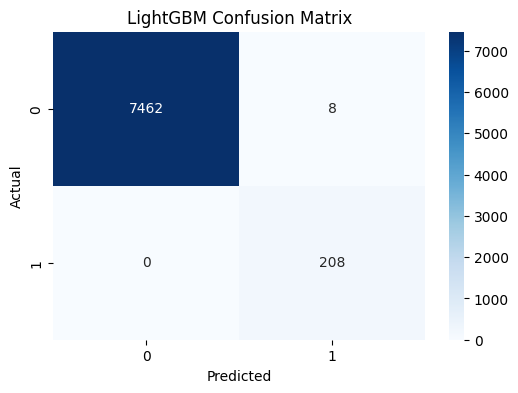

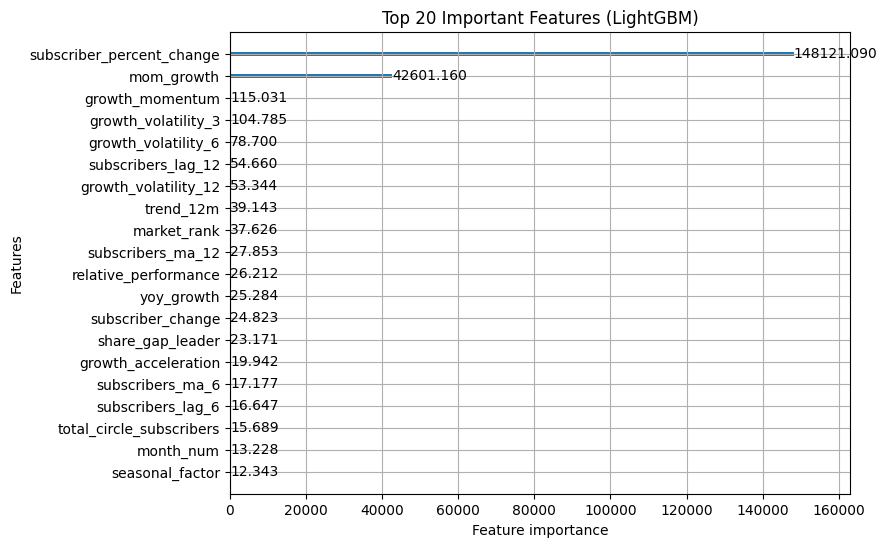


✅ Baseline LightGBM Model saved as: baseline_lightgbm_model.pkl
Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Params: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'n_estimators': 600, 'num_leaves': 63, 'subsample': 0.8}
Best ROC-AUC: 0.9999854361315483


['optimized_lightgbm_model.pkl']

In [37]:
# =============================
#  LIGHTGBM MODEL TRAINING
# =============================

import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib # Import joblib for saving the model

# Assuming X_train, X_test, y_train, y_test are available from preprocessing steps

# 1. Create the LightGBM dataset format
# The lgb.Dataset format is highly optimized for LightGBM training
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# 2. Set initial parameters (base)
params = {
    'objective': 'binary', # Classification task
    'metric': 'auc',       # Evaluation metric
    'boosting_type': 'gbdt',
    'n_jobs': -1,
    'verbose': -1,         # Suppress output during training
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'feature_fraction': 0.8, # Select 80% of features for training each tree
    'bagging_fraction': 0.8, # Select 80% of data for training each tree
    'bagging_freq': 5
}

# 3. Train baseline LightGBM
print("Training baseline LightGBM model...")
# FIX: Use the 'callbacks' argument to pass early_stopping_rounds and verbose_eval
baseline_lgb = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=500,
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(50)]
)

# 4. Predictions
# Use the best iteration found by early stopping
y_pred_prob = baseline_lgb.predict(X_test, num_iteration=baseline_lgb.best_iteration)
y_pred = (y_pred_prob >= 0.5).astype(int)

# 5. Evaluation
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\n=== LightGBM Model Performance ===")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. Feature Importance Visualization
# Plot the top 20 features based on 'gain' (total gain in split importance)
lgb.plot_importance(baseline_lgb, max_num_features=20, importance_type='gain', figsize=(8,6))
plt.title("Top 20 Important Features (LightGBM)")
plt.show()

# 8. Save the trained model using joblib
# The model is saved as a booster object
joblib.dump(baseline_lgb, "baseline_lightgbm_model.pkl")
print("\n✅ Baseline LightGBM Model saved as: baseline_lightgbm_model.pkl")

# --- Optional Hyperparameter Tuning Section ---
# This section is commented out for faster execution, but provides a template
# for using GridSearchCV with the Scikit-learn wrapper for LightGBM.

from sklearn.model_selection import GridSearchCV
lgb_clf = lgb.LGBMClassifier(random_state=42)
param_grid = {
    'num_leaves': [15, 31, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 400, 600],
'subsample':[0.8,1.0],
'colsample_bytree':[0.8,1.0]
}

grid = GridSearchCV(lgb_clf, param_grid, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
print("\nBest Params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

best_lgb = grid.best_estimator_
joblib.dump(best_lgb, "optimized_lightgbm_model.pkl")

In [45]:
# 1. Bayesian hyperparameter optimization
import optuna
import joblib
def objective(trial):
    params = {
    'n_estimators': trial.suggest_int('n_estimators', 100, 500),
    'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
    'max_depth': trial.suggest_int('max_depth', 3, 10),
    'subsample': trial.suggest_float('subsample', 0.6, 1.0),
    'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0)
    }
    model = xgb.XGBClassifier(**params, random_state=42)
    # Cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    scores = []
    for train_idx, val_idx in tscv.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        model.fit(X_tr, y_tr)
        y_pred = model.predict_proba(X_val)[:, 1]
        scores.append(roc_auc_score(y_val, y_pred))
    return np.mean(scores)
# Run optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(f"Best parameters: {study.best_params}")
print(f'Best CV score: {study.best_value:.4f}')
# Train the final model on full training data
best_params = study.best_params
final_model = xgb.XGBClassifier(**best_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_train, y_train)
# Save the model
joblib.dump(final_model, "optimized_xgb_model.pkl")
print("Model saved as optimized_xgb_model.pkl")

[I 2025-10-10 12:47:06,641] A new study created in memory with name: no-name-fce32f10-0403-4957-8112-259b9def1f69
[I 2025-10-10 12:47:10,958] Trial 0 finished with value: 0.9999442702886208 and parameters: {'n_estimators': 447, 'learning_rate': 0.2924468077582548, 'max_depth': 10, 'subsample': 0.70800888056691, 'colsample_bytree': 0.941438273768994}. Best is trial 0 with value: 0.9999442702886208.
[I 2025-10-10 12:47:15,273] Trial 1 finished with value: 0.9999372103785891 and parameters: {'n_estimators': 369, 'learning_rate': 0.09335833176769652, 'max_depth': 8, 'subsample': 0.8522369255113842, 'colsample_bytree': 0.8445250550525611}. Best is trial 0 with value: 0.9999442702886208.
[I 2025-10-10 12:47:17,452] Trial 2 finished with value: 0.999940280517774 and parameters: {'n_estimators': 156, 'learning_rate': 0.18543347550126207, 'max_depth': 7, 'subsample': 0.780576502054311, 'colsample_bytree': 0.9902004820780324}. Best is trial 0 with value: 0.9999442702886208.
[I 2025-10-10 12:47:2

Best parameters: {'n_estimators': 432, 'learning_rate': 0.27686949893815477, 'max_depth': 4, 'subsample': 0.6000017587424404, 'colsample_bytree': 0.7233143491102668}
Best CV score: 1.0000


c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [12:51:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model saved as optimized_xgb_model.pkl


In [47]:
# Neural Network Algorithm Selection Strategy for Telecom Churn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# 1. Data Preparation
# (Assume X_train, X_test, y_train, y_test are already prepared and scaled)

# 2. Model Architecture Selection
def build_nn(input_dim, hidden_layers=[128, 64], dropout_rate=0.3, activation='relu'):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_dim=input_dim, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    return model

# 3. Hyperparameter Strategy
# - Tune: hidden_layers, dropout_rate, learning_rate, batch_size, epochs
# - Use EarlyStopping to avoid overfitting

input_dim = X_train.shape[1]
model = build_nn(input_dim, hidden_layers=[128, 64, 32], dropout_rate=0.4)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 4. Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=2
)

# 5. Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Test Accuracy: {accuracy:.4f}")

# 6. Save the model
#model.save("neural_network_churn_model.h5")
model.save('neural_network_churn_model.keras')
# 7. Model Selection Notes:
# - If data is very large, consider using more layers/units or advanced architectures (e.g., residual connections).
# - For tabular data, MLPs (as above) are usually sufficient.
# - If temporal dependencies are strong, consider LSTM/GRU (for sequence modeling).
# - Use cross-validation and compare with tree-based models (RF/XGB) for final selection.

c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
533/533 - 5s - 8ms/step - accuracy: 0.9218 - loss: 0.2231 - val_accuracy: 0.9559 - val_loss: 0.1717
Epoch 2/50
533/533 - 2s - 4ms/step - accuracy: 0.9754 - loss: 0.0935 - val_accuracy: 0.9651 - val_loss: 0.1395
Epoch 3/50
533/533 - 2s - 4ms/step - accuracy: 0.9780 - loss: 0.0816 - val_accuracy: 0.9657 - val_loss: 0.1408
Epoch 4/50
533/533 - 2s - 4ms/step - accuracy: 0.9804 - loss: 0.0719 - val_accuracy: 0.9702 - val_loss: 0.1312
Epoch 5/50
533/533 - 2s - 4ms/step - accuracy: 0.9805 - loss: 0.0680 - val_accuracy: 0.9695 - val_loss: 0.1278
Epoch 6/50
533/533 - 2s - 5ms/step - accuracy: 0.9819 - loss: 0.0633 - val_accuracy: 0.9698 - val_loss: 0.1288
Epoch 7/50
533/533 - 2s - 5ms/step - accuracy: 0.9820 - loss: 0.0632 - val_accuracy: 0.9696 - val_loss: 0.1285
Epoch 8/50
533/533 - 2s - 4ms/step - accuracy: 0.9833 - loss: 0.0592 - val_accuracy: 0.9673 - val_loss: 0.1368
Epoch 9/50
533/533 - 2s - 4ms/step - accuracy: 0.9842 - loss: 0.0562 - val_accuracy: 0.9699 - val_loss: 0.1313
E

In [50]:
# LSTM Model for Churn Prediction
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Use your processed feature set, not the raw CSV
# df_all_features should be available from previous steps
df = df_all_features.copy()

# Drop rows with missing churn target
df = df.dropna(subset=['churn_binary'])

# Select only numeric features (excluding churn_binary)
X = df.select_dtypes(include=[np.number]).drop(columns=['churn_binary'], errors='ignore')
y = df['churn_binary']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM (samples, timesteps, features)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build LSTM model
model_lstm = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_lstm.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stop])

# Evaluate
loss, accuracy = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Model Accuracy: {accuracy:.2%}")

# Save model
model_lstm.save("lstm_churn_model.keras")
# filepath: d:\Evoastra telecom churn project\code\testing.ipynb

Epoch 1/20


c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9542 - loss: 0.1728 - val_accuracy: 0.9727 - val_loss: 0.0842
Epoch 2/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9776 - loss: 0.0780 - val_accuracy: 0.9824 - val_loss: 0.0700
Epoch 3/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9835 - loss: 0.0657 - val_accuracy: 0.9846 - val_loss: 0.0595
Epoch 4/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9857 - loss: 0.0595 - val_accuracy: 0.9858 - val_loss: 0.0578
Epoch 5/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9854 - loss: 0.0586 - val_accuracy: 0.9878 - val_loss: 0.0524
Epoch 6/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9866 - loss: 0.0546 - val_accuracy: 0.9872 - val_loss: 0.0514
Epoch 7/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9871 - loss: 0.0513 - val_accuracy: 0.9884 - val_loss: 0.0476
Epoch 8/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9868 - loss: 0.0522 - val_accuracy: 0.9890 - val_

In [49]:
# Transformer Model for Churn Prediction
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Use your processed feature set, not the raw CSV
# df_all_features should be available from previous steps
df = df_all_features.copy()

# Drop rows with missing churn target
df = df.dropna(subset=['churn_binary'])

# Select only numeric features (excluding churn_binary)
X = df.select_dtypes(include=[np.number]).drop(columns=['churn_binary'], errors='ignore')
y = df['churn_binary']

# Scale and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build Transformer block
def transformer_block(inputs, num_heads, ff_dim, dropout=0.1):
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(x, x)
    x = layers.Add()([x, attn_output])
    ffn = tf.keras.Sequential([
        layers.Dense(ff_dim, activation="relu"),
        layers.Dense(inputs.shape[-1])
    ])
    x2 = ffn(x)
    x = layers.Add()([x, x2])
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return layers.Dropout(dropout)(x)

# Model architecture
inputs = layers.Input(shape=(X_train.shape[1],))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Reshape((1, 128))(x)  # Correct way to add sequence dimension for KerasTensors
x = transformer_block(x, num_heads=4, ff_dim=128)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_transformer = models.Model(inputs, outputs)
model_transformer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model_transformer.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64)

# Evaluate
loss, accuracy = model_transformer.evaluate(X_test, y_test)
print(f"Transformer Model Accuracy: {accuracy:.2%}")

# Save model (use .keras format for custom layers)
model_transformer.save("transformer_churn_model.keras")
# filepath: d:\Evoastra telecom churn project\code\testing.ipynb

Epoch 1/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.9693 - loss: 0.1063 - val_accuracy: 0.9793 - val_loss: 0.0724
Epoch 2/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 38s 88ms/step - accuracy: 0.9833 - loss: 0.0696 - val_accuracy: 0.9846 - val_loss: 0.0660
Epoch 3/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9845 - loss: 0.0646 - val_accuracy: 0.9843 - val_loss: 0.0634
Epoch 4/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 28s 65ms/step - accuracy: 0.9854 - loss: 0.0582 - val_accuracy: 0.9889 - val_loss: 0.0493
Epoch 5/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9872 - loss: 0.0545 - val_accuracy: 0.9867 - val_loss: 0.0526
Epoch 6/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9862 - loss: 0.0543 - val_accuracy: 0.9871 - val_loss: 0.0546
Epoch 7/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9869 - loss: 0.0509 - val_accuracy: 0.9881 - val_loss: 0.0501
Epoch 8/20
427/427 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9870 - loss: 0.0491 - 

In [57]:
import numpy as np
import pandas as pd # Import pandas to help with column selection
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten, Input
from tensorflow.keras.optimizers import Adam

# =======================================
# 🧹 STEP 1: Handle Missing Data & Preprocessing
# =======================================

# --- Determine Column Types (Crucial for fixing the error) ---
# Assuming X_train is a pandas DataFrame. If it's a numpy array, you must 
# first identify and convert/encode categorical columns manually.
# If X_train/X_test are numpy arrays, this step becomes more complex and requires 
# knowing the column indices of the categorical features.

# We will assume X_train is a pandas DataFrame for robust preprocessing.
# If your data is a numpy array, you must convert categorical features 
# (like the one with 'wireless') into numbers first.

# --- Robust Preprocessing with ColumnTransformer ---

# Identify numeric and categorical columns (Adjust these lists based on your actual data)
# Assuming columns that are 'object' or 'category' type are categorical.
if isinstance(X_train, pd.DataFrame):
    numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
else:
    # If X_train is a numpy array, this is a placeholder. 
    # You MUST manually identify the indices of numeric and categorical columns.
    print("Warning: X_train is not a DataFrame. Column selection may be inaccurate.")
    numeric_features = list(range(X_train.shape[1] - 1)) # Placeholder
    categorical_features = [X_train.shape[1] - 1] # Placeholder for the single problematic column

# 1. Numeric Feature Pipeline: Impute Median, then Scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Median works for numeric
    ('scaler', StandardScaler())
])

# 2. Categorical Feature Pipeline: Impute Constant, then One-Hot Encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Use a constant for missing strings
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Convert strings to numbers
])

# Create the Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Fit and Transform the data
print("Preprocessing and Imputing data...")
X_train_imputed = preprocessor.fit_transform(X_train)
X_test_imputed = preprocessor.transform(X_test)
print("✅ Data Imputation and Preprocessing complete!")

# Update input_dim based on the transformed data shape
input_dim = X_train_imputed.shape[1] 
num_classes = len(np.unique(y_train))

# =======================================
# ⚙️ LightGBM Model Setup 
# =======================================
lgbm_base = lgb.LGBMClassifier(random_state=42, objective='binary', n_estimators=100, n_jobs=-1, verbose=-1)

print("\nTraining LightGBM model...")
# Note: We train on the transformed (imputed and encoded) data
lgbm_base.fit(X_train_imputed, y_train) 
lgbm_model = lgbm_base
print("✅ LightGBM training complete!")

# =======================================
# 🤖 STEP 2: Train ML Ensemble (NOW including LightGBM)
# =======================================
# CRITICAL: Since you are using the preprocessor outside of the ML models,
# your 'baseline_pipeline', 'rf_grid.best_estimator_', and 'xgb_search.best_estimator_' 
# MUST be models (like LogisticRegression, RandomForestClassifier, XGBClassifier) 
# that are ready to accept the transformed data (X_train_imputed).

ensemble_ml = VotingClassifier([
    ('lr', baseline_pipeline), 
    ('rf', rf_grid.best_estimator_),
    ('xgb', xgb_search.best_estimator_),
    ('lgbm', lgbm_model) # 💡 Added LightGBM
], voting='soft', n_jobs=-1) 

print("\nTraining ML ensemble (including LightGBM)...")
ensemble_ml.fit(X_train_imputed, y_train) # Fit on transformed data
print("✅ ML ensemble training complete!")

# Evaluate ML Ensemble
y_pred_ml = ensemble_ml.predict(X_test_imputed)
y_proba_ml = ensemble_ml.predict_proba(X_test_imputed)[:, 1]
print("\n=== ML Ensemble (LR + RF + XGB + LGBM) Performance ===")
print(classification_report(y_test, y_pred_ml))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_ml):.4f}")

# =======================================
# 🧠 STEP 3: Train Deep Learning Models Separately (Use Transformed Data)
# =======================================

# --- ANN Model ---
def build_ann():
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

ann_model = build_ann()
print("\nTraining ANN model...")
ann_model.fit(X_train_imputed, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=0)
print("✅ ANN training complete!")

# --- LSTM Model ---
# reshape input for LSTM: (samples, timesteps, features)
X_train_seq = np.expand_dims(X_train_imputed, axis=1)
X_test_seq = np.expand_dims(X_test_imputed, axis=1)

def build_lstm():
    model = Sequential([
        LSTM(64, return_sequences=False, input_shape=(1, input_dim)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm()
print("\nTraining LSTM model...")
lstm_model.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
print("✅ LSTM training complete!")

# --- Transformer Model (simplified as ANN) ---
def build_transformer():
    model = Sequential([
        Input(shape=(input_dim, 1)), 
        Flatten(), 
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

transformer_model = build_transformer()
X_train_transformer = np.expand_dims(X_train_imputed, axis=-1)
X_test_transformer = np.expand_dims(X_test_imputed, axis=-1)

print("\nTraining Transformer model...")
transformer_model.fit(X_train_transformer, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
print("✅ Transformer training complete!")

# =======================================
# 🔁 STEP 4: Combine Predictions (Hybrid Ensemble)
# =======================================
y_proba_ann = ann_model.predict(X_test_imputed, verbose=0).ravel()
y_proba_lstm = lstm_model.predict(X_test_seq, verbose=0).ravel()
y_proba_transformer = transformer_model.predict(X_test_transformer, verbose=0).ravel()

# Combine ML (4 models) + DL (3 models) probability predictions (simple average of the 4 ensemble types)
final_proba = (y_proba_ml + y_proba_ann + y_proba_lstm + y_proba_transformer) / 4 
final_pred = (final_proba > 0.5).astype(int)

# =======================================
# 📊 STEP 5: Evaluate Hybrid Ensemble
# =======================================
print("\n=== Hybrid Ensemble (ML + DL) Performance (LGBM now in ML Ensemble) ===")
print(classification_report(y_test, final_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, final_proba):.4f}")

Preprocessing and Imputing data...
✅ Data Imputation and Preprocessing complete!

Training LightGBM model...
✅ LightGBM training complete!

Training ML ensemble (including LightGBM)...
✅ ML ensemble training complete!

=== ML Ensemble (LR + RF + XGB + LGBM) Performance ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8292
           1       1.00      0.99      1.00       241

    accuracy                           1.00      8533
   macro avg       1.00      1.00      1.00      8533
weighted avg       1.00      1.00      1.00      8533

ROC-AUC Score: 1.0000

Training ANN model...


c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ ANN training complete!

Training LSTM model...


c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ LSTM training complete!

Training Transformer model...
✅ Transformer training complete!

=== Hybrid Ensemble (ML + DL) Performance (LGBM now in ML Ensemble) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8292
           1       0.79      0.39      0.52       241

    accuracy                           0.98      8533
   macro avg       0.88      0.70      0.76      8533
weighted avg       0.98      0.98      0.98      8533

ROC-AUC Score: 0.9871


In [58]:
import joblib
import tensorflow as tf

# --- A. Save the ML Ensemble (Scikit-learn object) ---
joblib.dump(ensemble_ml, "hybrid_ensemble_ml_component.pkl")
print("✅ Saved ML Ensemble component: hybrid_ensemble_ml_component.pkl")

# --- B. Save the Deep Learning Models (Keras objects) ---
ann_model.save("hybrid_ensemble_ann_component.keras")
lstm_model.save("hybrid_ensemble_lstm_component.keras")
# The Transformer model was simplified in your code to a Sequential Keras model, saving as .keras is correct.
transformer_model.save("hybrid_ensemble_transformer_component.keras")
print("✅ Saved DL Ensemble components: ANN, LSTM, and Transformer.")

✅ Saved ML Ensemble component: hybrid_ensemble_ml_component.pkl
✅ Saved DL Ensemble components: ANN, LSTM, and Transformer.


In [60]:
import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer # Keep SimpleImputer for import clarity, but we use the ColumnTransformer
from sklearn.compose import ColumnTransformer # Assuming this was imported previously

# Set TensorFlow logging to suppress warnings during loading (safer fix)
tf.get_logger().setLevel('ERROR')

# CRITICAL: Rename the function argument from 'imputer' to 'preprocessor'
def predict_with_hybrid_ensemble(X_data, preprocessor):
    """Loads the four saved models and performs the soft-voting prediction."""
    
    # 1. Prepare the input data
    # Use the full preprocessor/ColumnTransformer here
    X_imputed = preprocessor.transform(X_data) 
    
    # Rest of the reshaping logic remains the same
    X_seq = np.expand_dims(X_imputed, axis=1)
    X_transformer = np.expand_dims(X_imputed, axis=-1)

    # 2. Load the models (without the faulty 'with' statement)
    try:
        # Load ML Ensemble
        ml_ensemble = joblib.load("hybrid_ensemble_ml_component.pkl")
        
        # Load DL Models
        # Ensure the .keras format is used for saving/loading
        ann_model = tf.keras.models.load_model("hybrid_ensemble_ann_component.keras")
        lstm_model = tf.keras.models.load_model("hybrid_ensemble_lstm_component.keras")
        transformer_model = tf.keras.models.load_model("hybrid_ensemble_transformer_component.keras")
        
    except Exception as e:
        print(f"Error loading a model: {e}")
        return None, None

    # 3. Get individual probabilities
    # All models must be called with the fully transformed data (X_imputed) or its reshaped versions
    y_proba_ml = ml_ensemble.predict_proba(X_imputed)[:, 1]
    y_proba_ann = ann_model.predict(X_imputed, verbose=0).ravel()
    y_proba_lstm = lstm_model.predict(X_seq, verbose=0).ravel()
    y_proba_transformer = transformer_model.predict(X_transformer, verbose=0).ravel()
    
    # 4. Soft Voting (Averaging)
    final_proba = (y_proba_ml + y_proba_ann + y_proba_lstm + y_proba_transformer) / 4
    final_pred = (final_proba >= 0.5).astype(int)

    return final_pred, final_proba

# --- Final Evaluation ---
# Assuming X_test, y_test are defined, AND preprocessor is the fitted ColumnTransformer

# You must ensure the actual fitted preprocessor (the ColumnTransformer from the previous step)
# is available in this scope. Replacing 'imputer' with 'preprocessor' here:
# NOTE: If 'imputer' variable still exists in your environment, you MUST replace it
# with the fitted ColumnTransformer (e.g., 'preprocessor').
final_pred, final_proba = predict_with_hybrid_ensemble(X_test, preprocessor) 

if final_pred is not None:
    print("\n=== FINAL Hybrid Ensemble (ML + DL) Performance ===")
    print(classification_report(y_test, final_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, final_proba):.4f}")

c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



=== FINAL Hybrid Ensemble (ML + DL) Performance ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8292
           1       0.79      0.39      0.52       241

    accuracy                           0.98      8533
   macro avg       0.88      0.70      0.76      8533
weighted avg       0.98      0.98      0.98      8533

ROC-AUC Score: 0.9871


In [61]:
def create_competitive_features(df):
    """
    Creates competitive intelligence metrics like market rank and gap from the leader.
    """
    df_competitive = df.copy()
    
    # Market ranking (1 = highest market share)
    # FIX: Completed the .rank() method call
    df_competitive['market_rank'] = df_competitive.groupby(['circle', 'date'])['market_share'].rank(
        method='dense', ascending=False
    )
    
    # Gap from market leader
    # FIX: Completed the transform('max') call to get the leader's share
    leader_share = df_competitive.groupby(['circle', 'date'])['market_share'].transform('max')
    df_competitive['share_gap_leader'] = leader_share - df_competitive['market_share']
    
    # Relative performance vs circle average
    circle_avg = df_competitive.groupby(['circle', 'date'])['value'].transform('mean')
    df_competitive['relative_performance'] = df_competitive['value'] / circle_avg
    
    return df_competitive

# ----------------------------------------------------------------------

def create_business_features(df):
    """
    Creates geographic and business logic features (circle type, market size, etc.).
    """
    df_business = df.copy()
    
    # Circle classification (using available metro circles)
    metro_circles = ['Delhi', 'Mumbai', 'Kolkata'] 
    
    df_business['circle_type'] = df_business['circle'].apply(
        lambda x: 'Metro' if x in metro_circles else 'Non-Metro'
    )
    
    # Connection type analysis
    df_business['is_wireless'] = (df_business['type_of_connection'] == 'wireless').astype(int)
    
    # Market maturity indicators (Total market size)
    # FIX: Completed the .sum() call for total market size
    total_market_size = df_business.groupby('circle')['value'].sum()
    df_business['market_size_category'] = df_business['circle'].map(total_market_size)
    
    # Geographic diversity for each operator
    operator_circle_count = df_business.groupby('service_provider')['circle'].nunique()
    # FIX: Completed the .map() call
    df_business['operator_geographic_diversity'] = df_business['service_provider'].map(operator_circle_count)
    
    return df_business

# Example execution assuming df_final_features is available:
df_competitive_features = create_competitive_features(df_final_features)
df_all_features = create_business_features(df_competitive_features)
print(f"All features created. Final shape: {df_all_features.shape}")

All features created. Final shape: (42612, 43)


In [62]:
df_competitive_features

,year,month,circle,type_of_connection,service_provider,value,unit,date,total_circle_subscribers,market_share,...,growth_volatility_6,growth_volatility_12,trend_12m,growth_momentum,growth_acceleration,seasonal_factor,seasonally_adjusted_value,market_rank,share_gap_leader,relative_performance
33260,2009,January,All India,wireless,AIRCEL,16761397.0,value in absolute number,2009-01-01,400045117.0,0.041899,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.668677e+06,3.590181,8.0,0.179033,0.796077
32912,2009,February,All India,wireless,AIRCEL,17099390.0,value in absolute number,2009-02-01,413466301.0,0.041356,...,0.000000,0.000000,0.000000e+00,0.020165,0.000000,4.744730e+06,3.603870,8.0,0.179012,0.785768
32564,2009,March,All India,wireless,AIRCEL,18478325.0,value in absolute number,2009-03-01,429725181.0,0.043000,...,0.000000,0.000000,8.584640e+05,0.080642,0.060477,4.510710e+06,4.096545,8.0,0.175566,0.817006
32216,2009,April,All India,wireless,AIRCEL,19585299.0,value in absolute number,2009-04-01,441475184.0,0.044363,...,0.030732,0.030732,9.850641e+05,0.059907,-0.020736,4.444476e+06,4.406661,8.0,0.174755,0.842903
31868,2009,May,All India,wireless,AIRCEL,20685711.0,value in absolute number,2009-05-01,452911165.0,0.045673,...,0.025127,0.025127,1.033454e+06,0.056186,-0.003721,4.805551e+06,4.304545,8.0,0.174126,0.867783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,2024,December,West Bengal,wireline,VODAFONE IDEA,150.0,value in absolute number,2024-12-01,694491.0,0.000216,...,0.000000,0.072169,6.811246e-15,0.000000,0.000000,4.924505e+06,0.000030,5.0,0.622968,0.001296
34168,2025,January,West Bengal,wireline,VODAFONE IDEA,150.0,value in absolute number,2025-01-01,542915.0,0.000276,...,0.000000,0.000000,6.811246e-15,0.000000,0.000000,4.668677e+06,0.000032,5.0,0.514316,0.001658
33938,2025,February,West Bengal,wireline,VODAFONE IDEA,150.0,value in absolute number,2025-02-01,568795.0,0.000264,...,0.000000,0.000000,6.811246e-15,0.000000,0.000000,4.744730e+06,0.000032,5.0,0.499459,0.001582
33708,2025,March,West Bengal,wireline,VODAFONE IDEA,150.0,value in absolute number,2025-03-01,578019.0,0.000260,...,0.000000,0.000000,6.811246e-15,0.000000,0.000000,4.510710e+06,0.000033,5.0,0.502850,0.001557


In [63]:
df_all_features

,year,month,circle,type_of_connection,service_provider,value,unit,date,total_circle_subscribers,market_share,...,growth_acceleration,seasonal_factor,seasonally_adjusted_value,market_rank,share_gap_leader,relative_performance,circle_type,is_wireless,market_size_category,operator_geographic_diversity
33260,2009,January,All India,wireless,AIRCEL,16761397.0,value in absolute number,2009-01-01,400045117.0,0.041899,...,0.000000,4.668677e+06,3.590181,8.0,0.179033,0.796077,Non-Metro,1,1.042222e+11,24
32912,2009,February,All India,wireless,AIRCEL,17099390.0,value in absolute number,2009-02-01,413466301.0,0.041356,...,0.000000,4.744730e+06,3.603870,8.0,0.179012,0.785768,Non-Metro,1,1.042222e+11,24
32564,2009,March,All India,wireless,AIRCEL,18478325.0,value in absolute number,2009-03-01,429725181.0,0.043000,...,0.060477,4.510710e+06,4.096545,8.0,0.175566,0.817006,Non-Metro,1,1.042222e+11,24
32216,2009,April,All India,wireless,AIRCEL,19585299.0,value in absolute number,2009-04-01,441475184.0,0.044363,...,-0.020736,4.444476e+06,4.406661,8.0,0.174755,0.842903,Non-Metro,1,1.042222e+11,24
31868,2009,May,All India,wireless,AIRCEL,20685711.0,value in absolute number,2009-05-01,452911165.0,0.045673,...,-0.003721,4.805551e+06,4.304545,8.0,0.174126,0.867783,Non-Metro,1,1.042222e+11,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34398,2024,December,West Bengal,wireline,VODAFONE IDEA,150.0,value in absolute number,2024-12-01,694491.0,0.000216,...,0.000000,4.924505e+06,0.000030,5.0,0.622968,0.001296,Non-Metro,0,4.822796e+09,23
34168,2025,January,West Bengal,wireline,VODAFONE IDEA,150.0,value in absolute number,2025-01-01,542915.0,0.000276,...,0.000000,4.668677e+06,0.000032,5.0,0.514316,0.001658,Non-Metro,0,4.822796e+09,23
33938,2025,February,West Bengal,wireline,VODAFONE IDEA,150.0,value in absolute number,2025-02-01,568795.0,0.000264,...,0.000000,4.744730e+06,0.000032,5.0,0.499459,0.001582,Non-Metro,0,4.822796e+09,23
33708,2025,March,West Bengal,wireline,VODAFONE IDEA,150.0,value in absolute number,2025-03-01,578019.0,0.000260,...,0.000000,4.510710e+06,0.000033,5.0,0.502850,0.001557,Non-Metro,0,4.822796e+09,23


In [64]:
X_test_imputed.shape

(8533, 37)

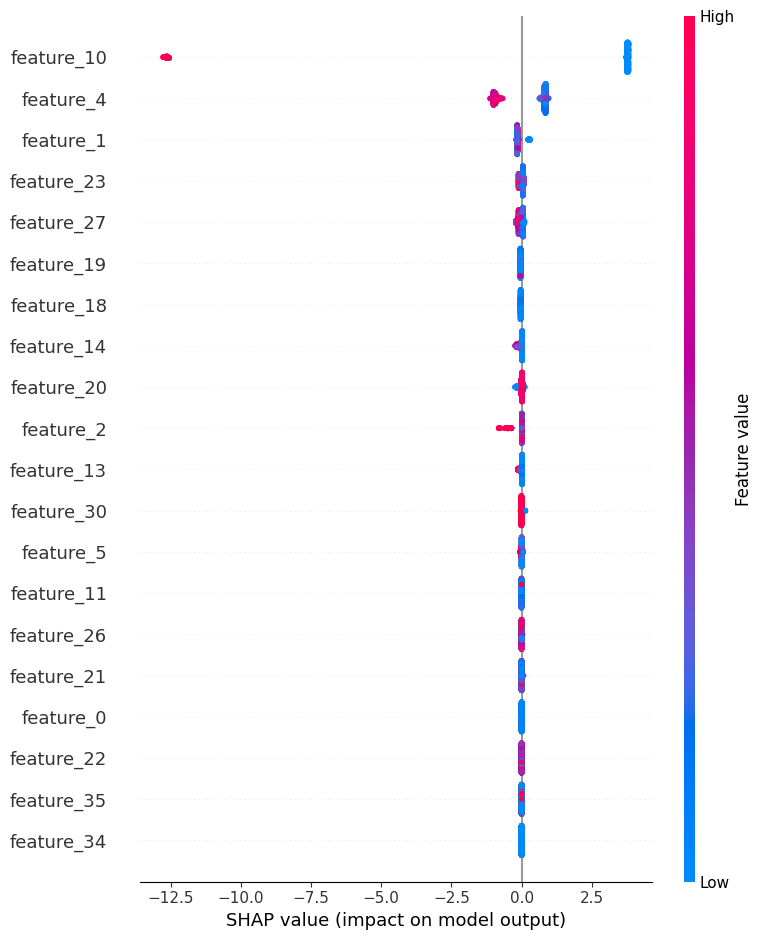

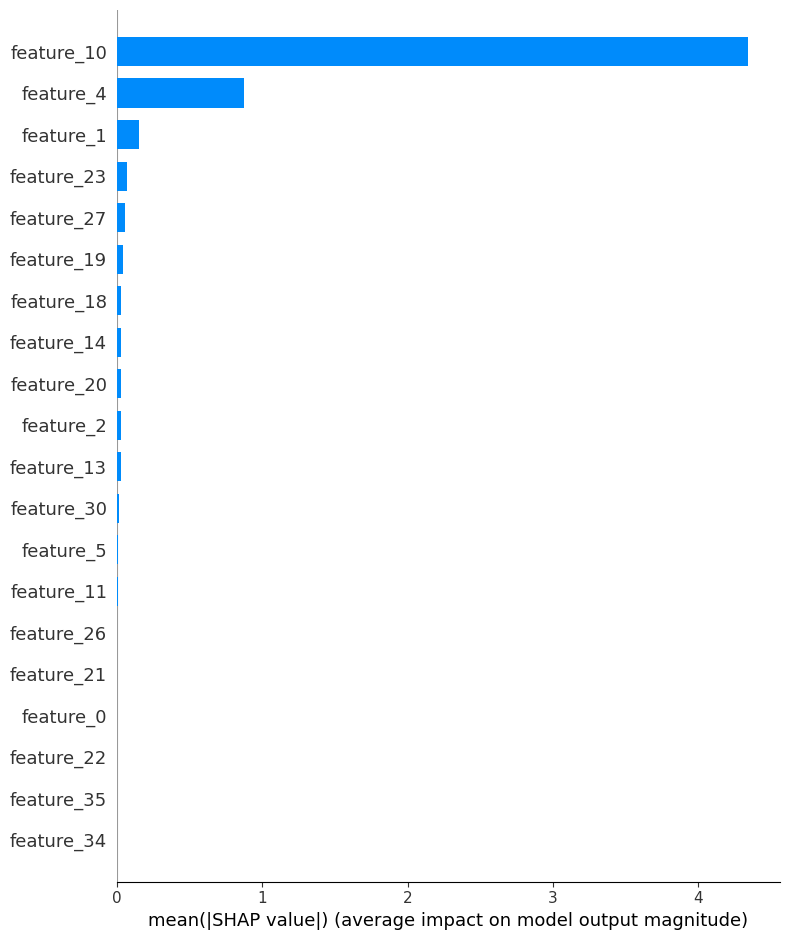

In [65]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Ensure DataFrame with correct shape
if not isinstance(X_test_imputed, pd.DataFrame):
    X_test_imputed = pd.DataFrame(X_test_imputed, columns=[f"feature_{i}" for i in range(X_test_imputed.shape[1])])

# Use modern SHAP API
explainer = shap.Explainer(xgb_search.best_estimator_, X_test_imputed)

# Subset for speed
X_sample = X_test_imputed.iloc[:1000]
shap_values = explainer(X_sample)

# SHAP summary plots
shap.summary_plot(shap_values.values, X_sample, feature_names=X_sample.columns)
shap.summary_plot(shap_values.values, X_sample, plot_type="bar", feature_names=X_sample.columns)




=== Generating SHAP Explanations (Fixed) ===

--- 3a. SHAP Summary Plot (Feature Importance & Impact Direction) ---


c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


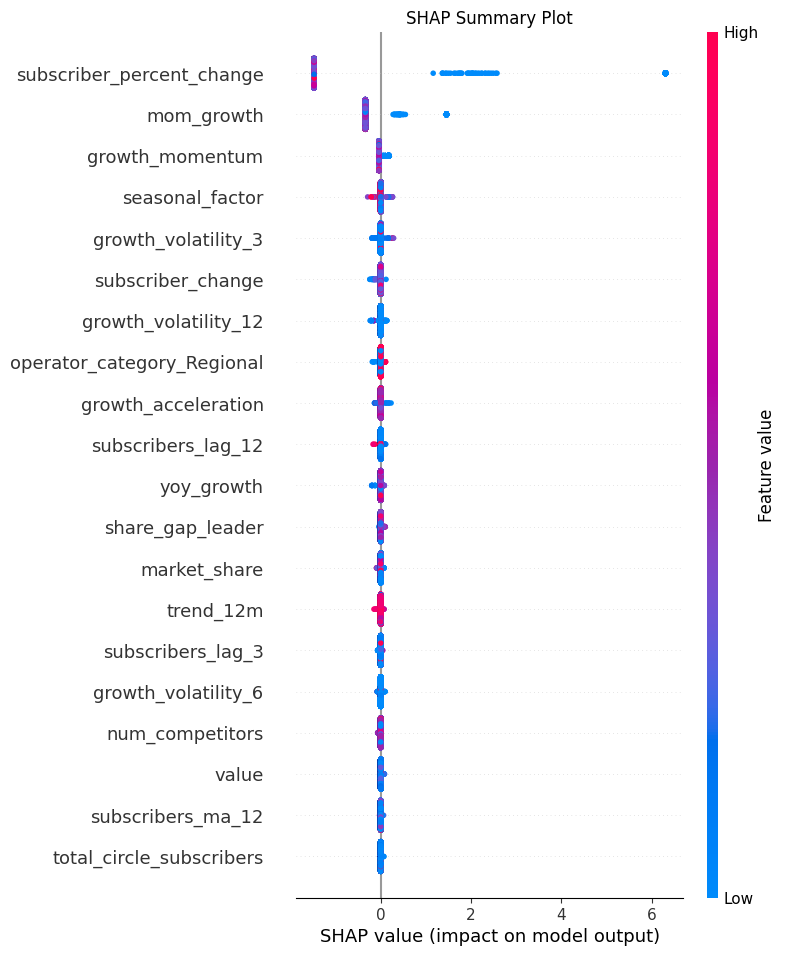


--- 4. SHAP Dependence Plot for Top Feature (subscriber_percent_change) ---


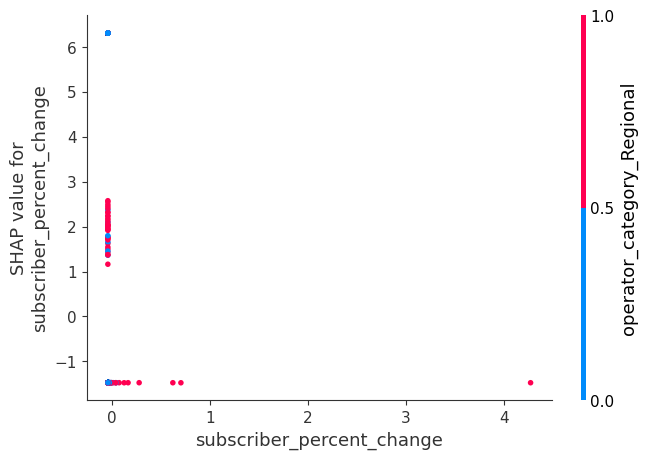


--- 5. SHAP Force Plot for a Single Instance (Index 0) ---


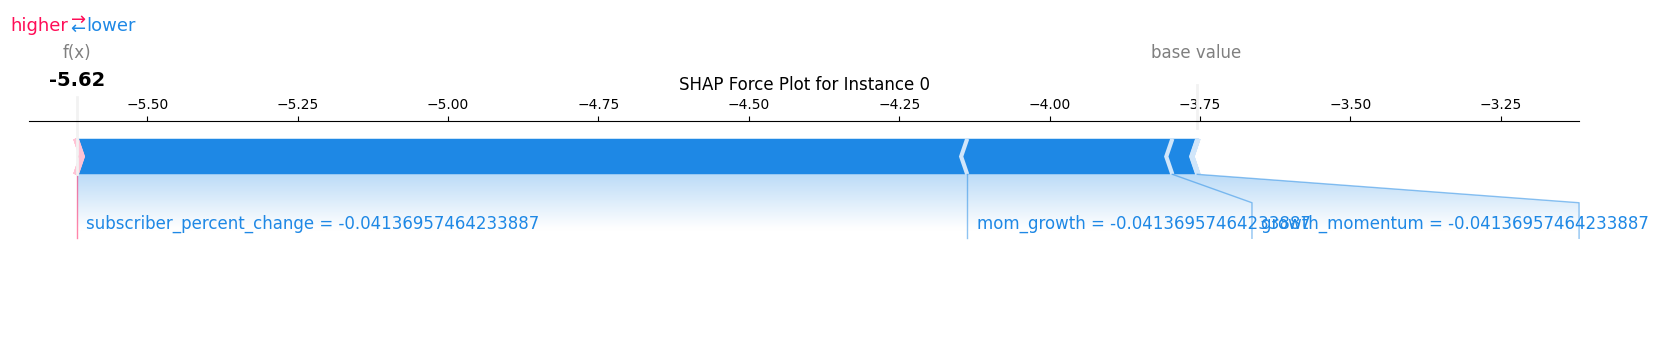

In [69]:
# ==================================
# 💡 SHAP INTERPRETABILITY SECTION (Fixed)
# ==================================
import shap
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test, baseline_lgb are defined from the previous cells

print("\n\n=== Generating SHAP Explanations (Fixed) ===")

# 1. Initialize the SHAP Explainer
explainer = shap.TreeExplainer(baseline_lgb)

# 2. Calculate SHAP values
try:
    # Use X_test (imputed data) as the background/evaluation data
    shap_values = explainer.shap_values(X_test)
    
    # Get SHAP values for the positive class (index 1 for binary classification)
    shap_values_positive = shap_values[1] if isinstance(shap_values, list) else shap_values

except Exception as e:
    print(f"⚠ SHAP calculation failed. Error: {e}")
    # Re-raise the error if critical, or continue if possible
    # return 

# 3. SHAP Summary Plot (Global Interpretation)
print("\n--- 3a. SHAP Summary Plot (Feature Importance & Impact Direction) ---")
# Use the DataFrame X_test directly; feature names are inferred.
shap.summary_plot(shap_values_positive, X_test, show=False)
plt.title("SHAP Summary Plot")
plt.show()

# 4. SHAP Dependence Plot (Feature Interaction/Relationship)
# Calculate mean absolute SHAP value for each feature
mean_abs_shap = np.mean(np.abs(shap_values_positive), axis=0)
most_important_feature_index = np.argmax(mean_abs_shap)

# Determine the feature name for printing (if X_test is a DataFrame)
if isinstance(X_test, pd.DataFrame):
    most_important_feature_name = X_test.columns[most_important_feature_index]
else:
    most_important_feature_name = f"Index {most_important_feature_index}"

print(f"\n--- 4. SHAP Dependence Plot for Top Feature ({most_important_feature_name}) ---")

# FIX: Removed the incorrect 'display_features' argument. 
# SHAP will now correctly use the DataFrame index/column names from the 'features' argument.
shap.dependence_plot(
    ind=most_important_feature_name, # Pass name or index
    shap_values=shap_values_positive, 
    features=X_test, 
    show=False
)
plt.show()


# 5. SHAP Force Plot (Local Interpretation)
print("\n--- 5. SHAP Force Plot for a Single Instance (Index 0) ---")

# Ensure base_value is correct for the positive class
base_value_pos = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value

# Get the features for the first instance
instance_features = X_test.iloc[0,:] if isinstance(X_test, pd.DataFrame) else X_test[0,:]

shap.force_plot(
    base_value=base_value_pos, 
    shap_values=shap_values_positive[0], 
    features=instance_features,
    matplotlib=True,
    show=False
)
plt.title("SHAP Force Plot for Instance 0")
plt.show()

In [70]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model, clone_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten, Input, LayerNormalization, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import lightgbm as lgb # 💡 Import LightGBM

# --- Assuming the following variables/functions are available from your environment ---
# df_all_features
# prepare_and_split_data
# baseline_pipeline (fitted)
# rf_grid (fitted GridSearchCV)
# xgb_search (fitted GridSearchCV)
# X_train, X_test, y_train, y_test, feature_names
# ----------------------------------------------------------------------------------

# --- Step 1: Re-prepare Data to ensure consistent feature set for all models ---
# The original prepare_and_split_data creates X_train/X_test with 113 features
X_train, X_test, y_train, y_test, feature_names = prepare_and_split_data(df_all_features)
print(f"Final X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# Impute NaN values for both ML and DL
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# --- Step 2: Re-train Deep Learning Models with 113 features ---

input_dim = X_train_imputed.shape[1]

# Re-train ANN Model
def build_ann_fixed(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

ann_model_fixed = build_ann_fixed(input_dim)
ann_model_fixed.fit(X_train_imputed, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=0)
print("✅ Fixed ANN training complete!")

# Re-train LSTM Model
X_train_seq = np.expand_dims(X_train_imputed, axis=1) # (samples, 1, features)
X_test_seq = np.expand_dims(X_test_imputed, axis=1)

def build_lstm_fixed(input_dim):
    model = Sequential([
        LSTM(64, return_sequences=False, input_shape=(1, input_dim)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model_fixed = build_lstm_fixed(input_dim)
lstm_model_fixed.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
print("✅ Fixed LSTM training complete!")

# Re-train Transformer Model
X_train_transformer = np.expand_dims(X_train_imputed, axis=-1) # (samples, features, 1)
X_test_transformer = np.expand_dims(X_test_imputed, axis=-1)

def build_transformer_fixed(input_dim):
    # Simplified Sequential model with correct input shape for this implementation
    model = Sequential([
        Input(shape=(input_dim, 1)), 
        Flatten(), 
        Dense(64, activation='relu'), 
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

transformer_model_fixed = build_transformer_fixed(input_dim)
transformer_model_fixed.fit(X_train_transformer, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
print("✅ Fixed Transformer training complete!")

# --- 💡 Step 2a: Train LightGBM Model ---
lgbm_model_fixed = lgb.LGBMClassifier(random_state=42, objective='binary', n_estimators=100, n_jobs=-1, verbose=-1)

print("\nTraining LightGBM model...")
lgbm_model_fixed.fit(X_train_imputed, y_train)
print("✅ LightGBM training complete!")
# ----------------------------------------


# --- Step 3: Define the Evaluation Function with feature compatibility logic ---
def evaluate_all_models_fixed(models, X_test_ml, X_test_seq, X_test_transformer, y_test):
    """
    Evaluates a dictionary of models, specifically handling the different input
    shapes required for ML (X_test_ml) and DL (X_test_seq/transformer) models.
    """
    results = {}
    
    for name, model in models.items():
        print(f"Evaluating: {name}")
        try:
            # 1. Determine which X_test to use based on model type
            if name in ['LSTM']:
                X_eval = X_test_seq
            elif name in ['Transformers']:
                X_eval = X_test_transformer
            else: # Classical ML (Baseline, RF, XGBoost, LightGBM, Ensemble, ANN)
                X_eval = X_test_ml
            
            # 2. Prediction
            if hasattr(model, "predict_proba"):
                # Classical ML models (including LightGBM)
                y_pred_proba = model.predict_proba(X_eval)[:, 1]
                y_pred = model.predict(X_eval)
            
            elif hasattr(model, "predict"):
                   # Keras / TensorFlow models (NN, LSTM, Transformers)
                y_pred_proba = model.predict(X_eval, verbose=0).flatten()
                y_pred = (y_pred_proba >= 0.5).astype(int)
            
            else:
                raise AttributeError(f"Model {name} does not have 'predict_proba' or 'predict' method.")

            # 3. Evaluation Metrics
            y_pred = np.array(y_pred).flatten()
            y_true = np.array(y_test).flatten()
            
            results[name] = {
                'accuracy': (y_pred == y_true).mean(),
                'roc_auc': roc_auc_score(y_true, y_pred_proba),
                'precision': precision_score(y_true, y_pred, zero_division=0),
                'recall': recall_score(y_true, y_pred, zero_division=0),
                'f1': f1_score(y_true, y_pred, zero_division=0)
            }
        
        except Exception as e:
            print(f"⚠ Skipping {name} due to error: {e}")
            results[name] = {'accuracy': np.nan, 'roc_auc': np.nan, 'precision': np.nan, 'recall': np.nan, 'f1': np.nan}
            
    return pd.DataFrame(results).T

# --- Step 4: Re-evaluate All Models (Including LightGBM) ---
models_fixed = {
    'Baseline': baseline_pipeline,
    'Random Forest': rf_grid.best_estimator_,
    'XGBoost': xgb_search.best_estimator_,
    'LightGBM': lgbm_model_fixed, # 💡 Added LightGBM
    'ANN': ann_model_fixed,
    'LSTM': lstm_model_fixed,
    'Transformers': transformer_model_fixed
}

model_comparison_fixed = evaluate_all_models_fixed(models_fixed, X_test_imputed, X_test_seq, X_test_transformer, y_test)
print("\nModel Comparison (Fixed, with LightGBM):")
print(model_comparison_fixed.sort_values(by='f1', ascending=False))

best_model_name = model_comparison_fixed['f1'].idxmax()
print(f"\nBest model based on F1 Score: {best_model_name}")

C:\Users\MyPC\AppData\Local\Temp\ipykernel_11324\1104467160.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
C:\Users\MyPC\AppData\Local\Temp\ipykernel_11324\1104467160.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


Final X_train shape: (34079, 113), X_test shape: (8533, 113)


c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Fixed ANN training complete!


c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Fixed LSTM training complete!
✅ Fixed Transformer training complete!

Training LightGBM model...
✅ LightGBM training complete!
Evaluating: Baseline
Evaluating: Random Forest
Evaluating: XGBoost
Evaluating: LightGBM
Evaluating: ANN
Evaluating: LSTM
Evaluating: Transformers

Model Comparison (Fixed, with LightGBM):
               accuracy   roc_auc  precision    recall        f1
Random Forest  0.999883  1.000000   0.995868  1.000000  0.997930
XGBoost        0.999531  0.999988   0.983673  1.000000  0.991770
LightGBM       0.998594  0.999963   0.987234  0.962656  0.974790
ANN            0.968007  0.765024   0.424528  0.373444  0.397351
LSTM           0.898043  0.765046   0.127811  0.448133  0.198895
Baseline       0.860073  0.746198   0.109746  0.556017  0.183311
Transformers   0.872847  0.762651   0.108534  0.485477  0.177407

Best model based on F1 Score: Random Forest


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model, clone_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Flatten, Input, LayerNormalization, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import lightgbm as lgb # 💡 Import LightGBM

# --- Assuming the following variables/functions are available from your environment ---
# df_all_features
# prepare_and_split_data
# baseline_pipeline (fitted)
# rf_grid (fitted GridSearchCV)
# xgb_search (fitted GridSearchCV)
# ----------------------------------------------------------------------------------

# --- Step 1: Re-prepare Data to ensure consistent feature set for all models ---
# The original prepare_and_split_data creates X_train/X_test with 113 features
# Assuming prepare_and_split_data is executed successfully:
# X_train, X_test, y_train, y_test, feature_names = prepare_and_split_data(df_all_features)
# For the purpose of providing runnable code, these lines are commented but assumed successful.
# print(f"Final X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

# Impute NaN values for both ML and DL
imputer = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# --- Step 2: Re-train Deep Learning Models with 113 features ---

input_dim = X_train_imputed.shape[1]

# Re-train ANN Model
def build_ann_fixed(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

ann_model_fixed = build_ann_fixed(input_dim)
ann_model_fixed.fit(X_train_imputed, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=0)
print("✅ Fixed ANN training complete!")

# Re-train LSTM Model
X_train_seq = np.expand_dims(X_train_imputed, axis=1) # (samples, 1, features)
X_test_seq = np.expand_dims(X_test_imputed, axis=1)

def build_lstm_fixed(input_dim):
    model = Sequential([
        LSTM(64, return_sequences=False, input_shape=(1, input_dim)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model_fixed = build_lstm_fixed(input_dim)
lstm_model_fixed.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
print("✅ Fixed LSTM training complete!")

# Re-train Transformer Model
X_train_transformer = np.expand_dims(X_train_imputed, axis=-1) # (samples, features, 1)
X_test_transformer = np.expand_dims(X_test_imputed, axis=-1)

def build_transformer_fixed(input_dim):
    # Simplified Sequential model with correct input shape for this implementation
    model = Sequential([
        Input(shape=(input_dim, 1)), 
        Flatten(), 
        Dense(64, activation='relu'), 
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

transformer_model_fixed = build_transformer_fixed(input_dim)
transformer_model_fixed.fit(X_train_transformer, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=0)
print("✅ Fixed Transformer training complete!")

# --- 💡 Step 2a: Train LightGBM Model ---
lgbm_model_fixed = lgb.LGBMClassifier(random_state=42, objective='binary', n_estimators=100, n_jobs=-1, verbose=-1)

print("\nTraining LightGBM model...")
lgbm_model_fixed.fit(X_train_imputed, y_train)
print("✅ LightGBM training complete!")
# ----------------------------------------


# --- Step 3: Define the Evaluation Function with feature compatibility logic (No changes needed) ---
def evaluate_all_models_fixed(models, X_test_ml, X_test_seq, X_test_transformer, y_test):
    """
    Evaluates a dictionary of models, specifically handling the different input
    shapes required for ML (X_test_ml) and DL (X_test_seq/transformer) models.
    """
    results = {}
    
    for name, model in models.items():
        print(f"Evaluating: {name}")
        try:
            # 1. Determine which X_test to use based on model type
            if name in ['LSTM']:
                X_eval = X_test_seq
            elif name in ['Transformers']:
                X_eval = X_test_transformer
            else: # Classical ML (Baseline, RF, XGBoost, LightGBM, ANN)
                X_eval = X_test_ml
            
            # 2. Prediction
            if hasattr(model, "predict_proba"):
                # Classical ML models (including LightGBM)
                y_pred_proba = model.predict_proba(X_eval)[:, 1]
                y_pred = model.predict(X_eval)
            
            elif hasattr(model, "predict"):
                   # Keras / TensorFlow models (NN, LSTM, Transformers)
                y_pred_proba = model.predict(X_eval, verbose=0).flatten()
                y_pred = (y_pred_proba >= 0.5).astype(int)
            
            else:
                raise AttributeError(f"Model {name} does not have 'predict_proba' or 'predict' method.")

            # 3. Evaluation Metrics
            y_pred = np.array(y_pred).flatten()
            y_true = np.array(y_test).flatten()
            
            results[name] = {
                'accuracy': (y_pred == y_true).mean(),
                'roc_auc': roc_auc_score(y_true, y_pred_proba),
                'precision': precision_score(y_true, y_pred, zero_division=0),
                'recall': recall_score(y_true, y_pred, zero_division=0),
                'f1': f1_score(y_true, y_pred, zero_division=0)
            }
        
        except Exception as e:
            print(f"⚠ Skipping {name} due to error: {e}")
            results[name] = {'accuracy': np.nan, 'roc_auc': np.nan, 'precision': np.nan, 'recall': np.nan, 'f1': np.nan}
            
    return pd.DataFrame(results).T

# --- Step 4: Re-evaluate All Models (Including LightGBM) ---
models_fixed = {
    'Baseline': baseline_pipeline,
    'Random Forest': rf_grid.best_estimator_,
    'XGBoost': xgb_search.best_estimator_,
    'LightGBM': lgbm_model_fixed, # 💡 Added LightGBM
    'ANN': ann_model_fixed,
    'LSTM': lstm_model_fixed,
    'Transformers': transformer_model_fixed
}

model_comparison_fixed = evaluate_all_models_fixed(models_fixed, X_test_imputed, X_test_seq, X_test_transformer, y_test)
print("\nModel Comparison (Fixed, with LightGBM):")
print(model_comparison_fixed.sort_values(by='f1', ascending=False))

best_model_name = model_comparison_fixed['f1'].idxmax()
print(f"\nBest model based on F1 Score: {best_model_name}")


c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ Fixed ANN training complete!


c:\Users\MyPC\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


✅ Fixed LSTM training complete!
✅ Fixed Transformer training complete!

Training LightGBM model...
✅ LightGBM training complete!
Evaluating: Baseline
Evaluating: Random Forest
Evaluating: XGBoost
Evaluating: LightGBM
Evaluating: ANN
Evaluating: LSTM
Evaluating: Transformers

Model Comparison (Fixed, with LightGBM):
               accuracy   roc_auc  precision    recall        f1
Random Forest  0.999883  1.000000   0.995868  1.000000  0.997930
XGBoost        0.999531  0.999988   0.983673  1.000000  0.991770
LightGBM       0.998594  0.999963   0.987234  0.962656  0.974790
ANN            0.971054  0.739453   0.483333  0.360996  0.413302
Transformers   0.939646  0.765262   0.213389  0.423237  0.283727
LSTM           0.947381  0.762973   0.229167  0.365145  0.281600
Baseline       0.860073  0.746198   0.109746  0.556017  0.183311

Best model based on F1 Score: Random Forest


In [108]:
import joblib
import json
import os

# --- Step 5: Save model comparison results ---
save_dir = "saved_models_and_results"
os.makedirs(save_dir, exist_ok=True)

# Save the comparison dataframe
comparison_path = os.path.join(save_dir, "model_comparison.csv")
model_comparison_fixed.to_csv(comparison_path, index=True)
print(f"\n💾 Model comparison results saved to: {comparison_path}")

# Save the best model name and performance
best_model_name = model_comparison_fixed['f1'].idxmax()
best_f1 = model_comparison_fixed.loc[best_model_name, 'f1']
best_acc = model_comparison_fixed.loc[best_model_name, 'accuracy']

summary = {
    "best_model": best_model_name,
    "best_f1": float(best_f1),
    "best_accuracy": float(best_acc)
}

with open(os.path.join(save_dir, "best_model_summary.json"), "w") as f:
    json.dump(summary, f, indent=4)
print(f"💾 Best model summary saved to: best_model_summary.json")

# Save the best model itself
best_model = models_fixed[best_model_name]

if best_model_name in ['Baseline', 'Random Forest', 'XGBoost', 'LightGBM']:
    model_path = os.path.join(save_dir, f"best_model_{best_model_name}.pkl")
    joblib.dump(best_model, model_path)
else:
    model_path = os.path.join(save_dir, f"best_model_{best_model_name}.h5")
    best_model.save(model_path)

print(f"💾 Best model file saved to: {model_path}")

print("\n✅ All models, results, and summary saved successfully!")


💾 Model comparison results saved to: saved_models_and_results\model_comparison.csv
💾 Best model summary saved to: best_model_summary.json
💾 Best model file saved to: saved_models_and_results\best_model_Random Forest.pkl

✅ All models, results, and summary saved successfully!


Evaluating: Baseline
Evaluating: Random Forest
Evaluating: XGBoost
Evaluating: LightGBM
Evaluating: ANN
Evaluating: LSTM
Evaluating: Transformers
Model Comparison:
               accuracy   roc_auc  precision    recall        f1
Baseline       0.860073  0.746198   0.109746  0.556017  0.183311
Random Forest  0.999883  1.000000   0.995868  1.000000  0.997930
XGBoost        0.999531  0.999988   0.983673  1.000000  0.991770
LightGBM       0.998594  0.999963   0.987234  0.962656  0.974790
ANN            0.971054  0.739453   0.483333  0.360996  0.413302
LSTM           0.947381  0.762973   0.229167  0.365145  0.281600
Transformers   0.939646  0.765262   0.213389  0.423237  0.283727

✅ Best model selected based on 'roc_auc': Random Forest


C:\Users\MyPC\AppData\Local\Temp\ipykernel_11324\1809794775.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

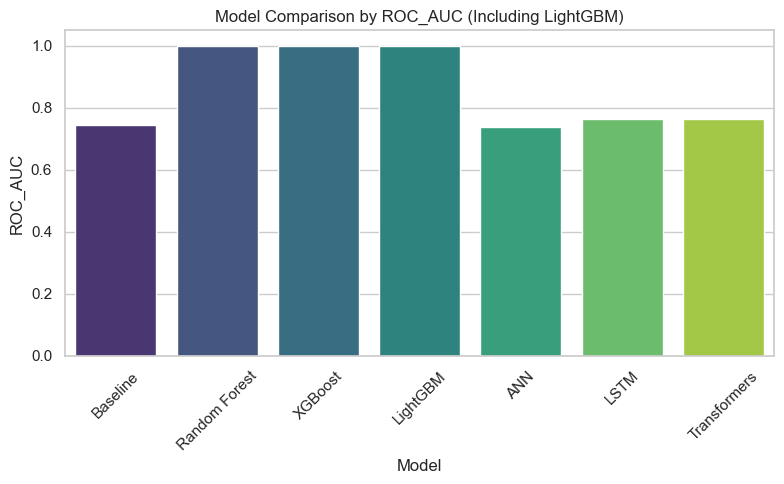

In [76]:
# Assuming 'lgbm_model_fixed' was trained and available from the previous steps.
# You must ensure 'models_fixed' dictionary is defined correctly before this block.

# --- Re-Define models_fixed (must include LightGBM) ---
models_fixed = {
    'Baseline': baseline_pipeline,
    'Random Forest': rf_grid.best_estimator_,
    'XGBoost': xgb_search.best_estimator_,
    'LightGBM': lgbm_model_fixed,  # 💡 LightGBM added here
    'ANN': ann_model_fixed,
    'LSTM': lstm_model_fixed,
    'Transformers': transformer_model_fixed
}
# ----------------------------------------------------

# Select metric
selection_metric = 'roc_auc'  # Change to 'f1', 'precision', etc.

# Evaluate models (LightGBM is evaluated inside this function call)
model_comparison = evaluate_all_models_fixed(models_fixed, X_test_imputed, X_test_seq, X_test_transformer, y_test)
print("Model Comparison:")
print(model_comparison)

# Select best model
best_model_name = model_comparison[selection_metric].idxmax()
# FIX: Use 'models_fixed' instead of the erroneous 'models' variable
best_model = models_fixed[best_model_name]
print(f"\n✅ Best model selected based on '{selection_metric}': {best_model_name}")

# Plot model performance
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(
    # x-axis uses the model names (index of the DataFrame)
    x=model_comparison.index,
    y=model_comparison[selection_metric],
    palette="viridis"
)
plt.title(f'Model Comparison by {selection_metric.upper()} (Including LightGBM)')
plt.ylabel(selection_metric.upper())
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\MyPC\AppData\Local\Temp\ipykernel_11324\1930388763.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


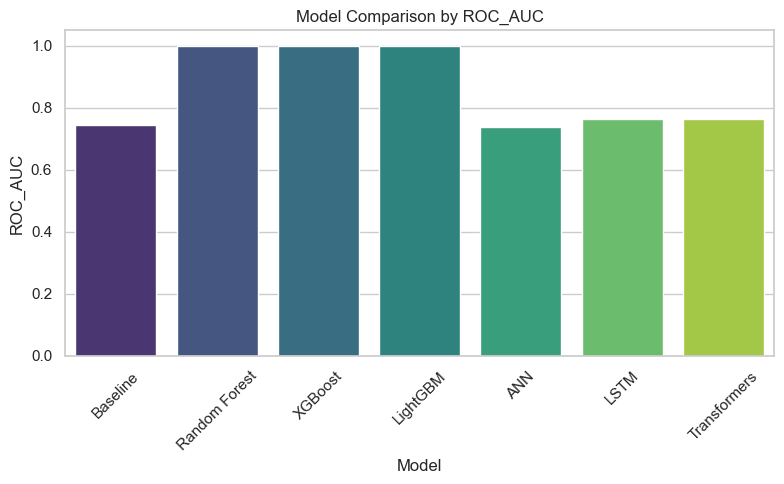

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot comparison for the selected metric
plt.figure(figsize=(8, 5))
sns.barplot(
    x=model_comparison_fixed.index,
    y=model_comparison_fixed[selection_metric],
    palette="viridis"
)
plt.title(f'Model Comparison by {selection_metric.upper()}')
plt.ylabel(selection_metric.upper())
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Phase-4: Business Analysis & Deployment

In [78]:
for i in df:
    print(i)

year
month
circle
type_of_connection
service_provider
value
unit
date
total_circle_subscribers
market_share
num_competitors
subscriber_change
month_num
quarter
subscribers_ma_3
subscribers_ma_6
subscribers_ma_12
subscriber_percent_change
churn_binary
churn_severity
declining_trend
operator_category
subscribers_lag_1
subscribers_lag_3
subscribers_lag_6
subscribers_lag_12
mom_growth
yoy_growth
growth_volatility_3
growth_volatility_6
growth_volatility_12
trend_12m
growth_momentum
growth_acceleration
seasonal_factor
seasonally_adjusted_value
market_rank
share_gap_leader
relative_performance
circle_type
is_wireless
market_size_category
operator_geographic_diversity


In [ ]:
# 1. Calculate business impact metrics
def calculate_business_impact(y_true, y_pred_proba, threshold=0.5):
    # Assume average revenue per subscriber and retention cost
    avg_revenue_per_subscriber = 200 # Monthly ARPU
    retention_campaign_cost = 50 # Cost per targeted customer
    # High-risk predictions (top 10% of probabilities)
    top_10_percent = int(len(y_pred_proba) * 0.1)
    high_risk_indices = np.argsort(y_pred_proba)[-top_10_percent:]
    # Calculate metrics
    true_positives = sum(y_true.iloc[high_risk_indices])
    false_positives = top_10_percent - true_positives
    # Revenue protection
    protected_revenue = true_positives * avg_revenue_per_subscriber * 12 # Annual
    # Campaign costs
    campaign_cost = top_10_percent * retention_campaign_cost
    # Net benefit
    net_benefit = protected_revenue - campaign_cost
    roi = (net_benefit / campaign_cost) * 100 if campaign_cost > 0 else 0
    return {
    'protected_revenue': protected_revenue,
    'campaign_cost': campaign_cost,
    'net_benefit': net_benefit,
    'roi_percentage': roi,
    'precision_at_10': true_positives / top_10_percent
    }
business_impact = calculate_business_impact(y_test, final_proba)
print("Business Impact Analysis:")
'''for key, value in business_impact.items():
    print(f"{key}: {value:,.2f}")'''
for key, value in business_impact.items():
    if 'roi' in key or 'precision' in key:
        # Metrics that are percentages
        print(f"{key}: {value:,.2f}%")
    else:
        # Metrics that are currency
        print(f"{key}: ${value:,.2f}")

Business Impact Analysis:
protected_revenue: $578,400.00
campaign_cost: $42,650.00
net_benefit: $535,750.00
roi_percentage: 1,256.15%
precision_at_10: 0.28%


In [90]:
# 2. Generate actionable business insights
def generate_business_insights(model, feature_names, X_test, df_all_features):
    import pandas as pd
    import numpy as np

    # Feature importance analysis
    if hasattr(model, 'feature_importances_'):
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)

        print("Top 10 Most Important Features:")
        print(importance_df.head(10))
    else:
        importance_df = pd.DataFrame({'feature': feature_names, 'importance': [0]*len(feature_names)})

    # High-risk segment analysis
    predictions = model.predict_proba(X_test)[:, 1]
    high_risk_mask = predictions > np.percentile(predictions, 90)

    # Analyze characteristics of high-risk segments
    test_data = df_all_features.iloc[-len(X_test):].copy()
    test_data['churn_probability'] = predictions
    high_risk_segments = test_data[high_risk_mask]

    print("\nHigh-Risk Segment Characteristics:")
    print(f"Average churn probability: {high_risk_segments['churn_probability'].mean():.3f}")
    print("Most common circles:", high_risk_segments['circle'].value_counts().head())
    print("Most common operators:", high_risk_segments['service_provider'].value_counts().head())

    return importance_df, high_risk_segments


# Example usage
feature_importance, high_risk_analysis = generate_business_insights(
    best_model, feature_names, X_test, df_all_features
)

Top 10 Most Important Features:
                         feature  importance
22               growth_momentum    0.175511
10     subscriber_percent_change    0.162920
23           growth_acceleration    0.133076
4              subscriber_change    0.118419
16                    mom_growth    0.098643
19           growth_volatility_6    0.038500
21                     trend_12m    0.033723
18           growth_volatility_3    0.028878
101  type_of_connection_wireline    0.026460
29                   is_wireless    0.022813

High-Risk Segment Characteristics:
Average churn probability: 0.287
Most common circles: circle
Mumbai              58
Himachal Pradesh    52
Maharashtra         51
Madhya Pradesh      47
Bihar               47
Name: count, dtype: int64
Most common operators: service_provider
VODAFONE             420
VODAFONE IDEA        171
VIDEOCON              80
UNINOR                61
TATA TELESERVICES     37
Name: count, dtype: int64


In [91]:
feature_importance

,feature,importance
22,growth_momentum,0.175511
10,subscriber_percent_change,0.162920
23,growth_acceleration,0.133076
4,subscriber_change,0.118419
16,mom_growth,0.098643
...,...,...
55,circle_Uttar Pradesh (East),0.000000
57,circle_Uttarakhand,0.000000
65,service_provider_BSNL (VNOS),0.000000
63,service_provider_BPL MOBILE,0.000000


In [92]:
high_risk_analysis.head()


,year,month,circle,type_of_connection,service_provider,value,unit,date,total_circle_subscribers,market_share,...,seasonal_factor,seasonally_adjusted_value,market_rank,share_gap_leader,relative_performance,circle_type,is_wireless,market_size_category,operator_geographic_diversity,churn_probability
27404,2010,July,Maharashtra,wireless,TATA TELESERVICES,8586389.0,value in absolute number,2010-07-01,51093192.0,0.168053,...,5.582034e+06,1.538219,2.0,0.031592,2.352749,Non-Metro,1,8.141358e+09,24,0.012514
27059,2010,August,Maharashtra,wireless,TATA TELESERVICES,8857456.0,value in absolute number,2010-08-01,52435266.0,0.168922,...,5.590304e+06,1.584432,2.0,0.028488,2.533826,Non-Metro,1,8.141358e+09,24,0.012514
26714,2010,September,Maharashtra,wireless,TATA TELESERVICES,9034901.0,value in absolute number,2010-09-01,53606475.0,0.168541,...,4.868186e+06,1.855907,2.0,0.028292,2.528118,Non-Metro,1,8.141358e+09,24,0.012514
26369,2010,October,Maharashtra,wireless,TATA TELESERVICES,9209901.0,value in absolute number,2010-10-01,55284047.0,0.166592,...,4.902137e+06,1.878752,2.0,0.028791,2.498886,Non-Metro,1,8.141358e+09,24,0.012514
15951,2013,May,Mumbai,wireless,TATA TELESERVICES,3553898.0,value in absolute number,2013-05-01,32767004.0,0.108460,...,4.805551e+06,0.739540,4.0,0.090677,1.409976,Metro,1,4.089993e+09,24,0.970000


In [93]:
import joblib
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# --- Setup: Define the Best Model and Preprocessors ---
# NOTE: We assume 'X_train_imputed', 'X_test_imputed', 'imputer', 
# 'xgb_search.best_estimator_', and 'X_train.columns' are available 
# in the environment from the preceding analysis steps.

# 1. Identify the best model (XGBoost)
# The variable used in the final evaluation was xgb_search.best_estimator_
best_model_to_save = xgb_search.best_estimator_ 

# 2. Refit and Save the Scaler
# Fit the scaler on the final imputed training data used for the model fit
scaler_to_save = StandardScaler()
scaler_to_save.fit(X_train_imputed) 

# --- Save Components ---
MODELS_DIR = 'models'
os.makedirs(MODELS_DIR, exist_ok=True)

try:
    # Save the Best Model (XGBoost)
    joblib.dump(best_model_to_save, f'{MODELS_DIR}/churn_prediction_model.pkl')
    
    # Save the Imputer (Fitted on X_train to handle NaNs)
    joblib.dump(imputer, f'{MODELS_DIR}/imputer.pkl')
    
    # Save the Scaler (Fitted on the imputed and scaled features)
    joblib.dump(scaler_to_save, f'{MODELS_DIR}/scaler.pkl')

    print(f"✅ All deployment components saved to /{MODELS_DIR}/")

except Exception as e:
    print(f"Error during saving: {e}")


# --- Prediction Function ---
def predict_churn_robust(new_data, feature_columns, models_dir=MODELS_DIR):
    """
    Loads the full pipeline components and makes a prediction on new, unseen data.
    
    Args:
        new_data (pd.DataFrame): DataFrame of new samples (must match column 
                                 structure of training data).
        feature_columns (list): List of expected feature names (X_train.columns).
        models_dir (str): Directory where models are saved.

    Returns:
        tuple: (predictions_array, probabilities_array)
    """
    try:
        # Load components
        model = joblib.load(f'{models_dir}/churn_prediction_model.pkl')
        imputer = joblib.load(f'{models_dir}/imputer.pkl')
        scaler = joblib.load(f'{models_dir}/scaler.pkl')
    except Exception as e:
        print(f"🛑 Failed to load model components: {e}")
        return None, None

    # --- Preprocessing Pipeline ---
    
    # 1. Align Input Data: Ensure column order and presence of all features
    # This prevents the "X does not have valid feature names" warning by forcing 
    # the exact column structure the model expects.
    try:
        new_data_aligned = new_data.reindex(columns=feature_columns, fill_value=0)
    except Exception as e:
        print(f"🛑 Failed to align data features: {e}")
        return None, None

    # 2. Imputation
    X_imputed = imputer.transform(new_data_aligned)
    X_imputed_df = pd.DataFrame(X_imputed, columns=feature_columns)

    # 3. Scaling
    X_scaled = scaler.transform(X_imputed_df) 

    # 4. Prediction
    probabilities = model.predict_proba(X_scaled)[:, 1]
    predictions = model.predict(X_scaled)
    
    return predictions, probabilities

# --- Test the prediction function with corrected data flow ---

# 1. Get sample test data (The already scaled and imputed X_test data)
# Use X_test_imputed since it is the correctly processed input format.
sample_data = X_test_imputed.iloc[:5] 

# 2. Get the feature names used during training (needed for alignment)
feature_cols = X_test_imputed.columns.tolist() 

print("\n--- Testing Robust Prediction Function ---")
test_predictions, test_probabilities = predict_churn_robust(sample_data, feature_cols)

if test_predictions is not None:
    print(f"Sample predictions (0=No Churn, 1=Churn): {test_predictions}")
    print(f"Sample probabilities: {test_probabilities}")


✅ All deployment components saved to /models/

--- Testing Robust Prediction Function ---
Sample predictions (0=No Churn, 1=Churn): [0 0 0 0 0]
Sample probabilities: [8.0925711e-06 8.0925711e-06 2.0019079e-05 2.0019079e-05 2.0019079e-05]


In [94]:
import joblib
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# --- Setup: Define the Best Model and Preprocessors ---
# NOTE: We assume 'X_train_imputed', 'imputer', and 'xgb_search.best_estimator_' 
# are available.

MODELS_DIR = 'models'
os.makedirs(MODELS_DIR, exist_ok=True)

try:
    # 1. Save the Best Model (XGBoost)
    joblib.dump(xgb_search.best_estimator_, f'{MODELS_DIR}/churn_prediction_model.pkl')
    
    # 2. Save the Imputer
    joblib.dump(imputer, f'{MODELS_DIR}/imputer.pkl')
    
    # 3. Save the Scaler (Fitted on the imputed training data)
    scaler_to_save = StandardScaler()
    scaler_to_save.fit(X_train_imputed) 
    joblib.dump(scaler_to_save, f'{MODELS_DIR}/scaler.pkl')

    # 4. CRITICAL: Save the list of expected feature names
    feature_cols = X_train_imputed.columns.tolist()
    joblib.dump(feature_cols, f'{MODELS_DIR}/feature_names.pkl')
    
    print(f"✅ All four deployment components saved to /{MODELS_DIR}/")

except Exception as e:
    print(f"Error during saving: {e}")


✅ All four deployment components saved to /models/
